🎯 LOGISTICS SIMULATION ANALYSIS
Choose analysis method:
1. Load data from CSV files
2. Use existing DataFrames
✅ Package data loaded successfully: 48048 rows, 8 columns
✅ Simulation data loaded successfully: 27448 rows, 8 columns
🚀 STARTING DRONE FLIGHT DISTANCE AND TASK COMPLETION TIME ANALYSIS

DRONE FLIGHT DISTANCE ANALYSIS

🚁 Individual Drone Flight Distance Analysis:
--------------------------------------------------
Drone 0:
  Total flight distance: 770.85
  Average distance per step: 0.77
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 174

Drone 1:
  Total flight distance: 727.29
  Average distance per step: 0.73
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 161

Drone 2:
  Total flight distance: 918.93
  Average distance per step: 0.92
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 204

Drone 3:
  Total flight distance: 785.33
  Average distance per step: 0.79
  Maximum sin

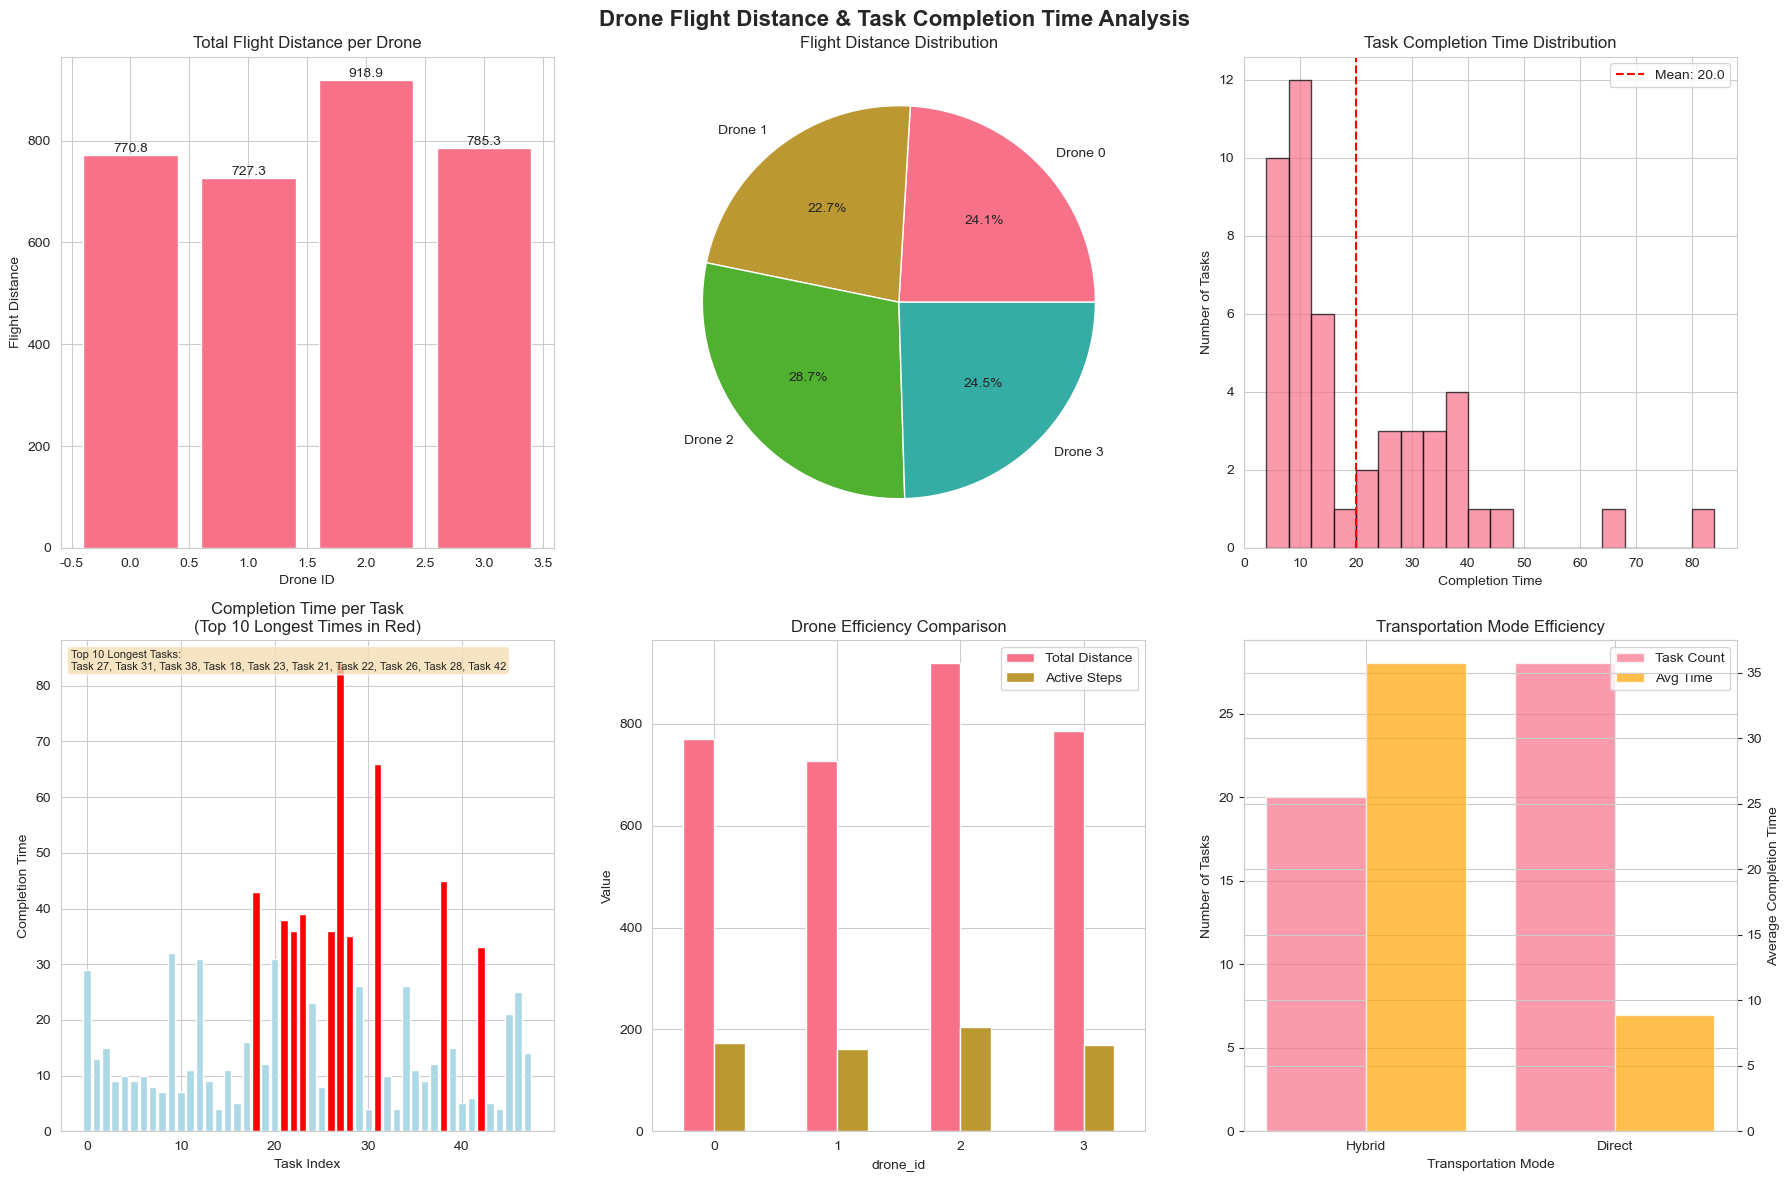


📋 EXECUTIVE SUMMARY REPORT

🚁 DRONE FLEET PERFORMANCE SUMMARY:
  Total drones deployed: 4
  TOTAL FLEET FLIGHT DISTANCE: 3202.39
  Average flight distance per drone: 800.60
  Flight distance standard deviation: 82.65
  Most efficient drone: Drone 2
  Least efficient drone: Drone 1

📦 TASK COMPLETION SUMMARY:
  Total completed tasks: 48
  TOTAL COMPLETION TIME (ALL TASKS): 962
  Average task completion time: 20.04
  Completion time standard deviation: 16.86
  Fastest task completion: 4
  Slowest task completion: 84
  Median completion time: 12.50

📊 SYSTEM EFFICIENCY METRICS:
  Distance/Time efficiency ratio: 39.95
  Fleet utilization rate: 17.72%
  Workload balance score: 89.68%

🚚 TRANSPORTATION MODE PERFORMANCE:
  Direct delivery tasks: 28 (Avg time: 8.86)
  Hybrid delivery tasks: 20 (Avg time: 35.70)

✅ ANALYSIS COMPLETED SUCCESSFULLY!

🎉 Analysis results are ready!
Key metrics calculated:
- Total flight distance: 3202.39
- Total completion time: 962
- Completed tasks: 48


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style and parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

class DroneTaskAnalyzer:
    """
    Specialized analyzer for drone flight distances and task completion times
    Provides detailed metrics for logistics simulation performance evaluation
    """
    
    def __init__(self, package_df=None, simulation_df=None):
        self.package_df = package_df
        self.simulation_df = simulation_df
        
    def load_data(self, package_file='package_simulation_records.csv', 
                  simulation_file='simulation_records.csv'):
        """Load simulation data from CSV files"""
        try:
            self.package_df = pd.read_csv(package_file)
            print(f"✅ Package data loaded successfully: {self.package_df.shape[0]} rows, {self.package_df.shape[1]} columns")
            
            self.simulation_df = pd.read_csv(simulation_file)
            print(f"✅ Simulation data loaded successfully: {self.simulation_df.shape[0]} rows, {self.simulation_df.shape[1]} columns")
            
        except Exception as e:
            print(f"❌ Data loading failed: {e}")
            return False
        return True
    
    def calculate_drone_flight_distances(self):
        """Calculate total flight distance for each drone"""
        print("\n" + "="*60)
        print("DRONE FLIGHT DISTANCE ANALYSIS")
        print("="*60)
        
        if self.simulation_df is None:
            print("❌ No simulation data available")
            return None
        
        # Filter drone data
        drone_data = self.simulation_df[self.simulation_df['entity'] == 'drone'].copy()
        
        if drone_data.empty:
            print("❌ No drone data found")
            return None
        
        drone_distances = []
        total_flight_distance = 0
        
        print(f"\n🚁 Individual Drone Flight Distance Analysis:")
        print("-" * 50)
        
        for drone_id in sorted(drone_data['id'].unique()):
            # Get single drone trajectory data, sorted by time
            single_drone = drone_data[drone_data['id'] == drone_id].sort_values('time')
            
            # Calculate movement distance for each step
            distances = []
            for i in range(1, len(single_drone)):
                prev_x = single_drone.iloc[i-1]['x']
                prev_y = single_drone.iloc[i-1]['y']
                curr_x = single_drone.iloc[i]['x']
                curr_y = single_drone.iloc[i]['y']
                
                # Calculate Euclidean distance
                distance = np.sqrt((curr_x - prev_x)**2 + (curr_y - prev_y)**2)
                distances.append(distance)
            
            # Calculate total distance
            total_distance = sum(distances)
            avg_distance_per_step = np.mean(distances) if distances else 0
            max_distance_step = max(distances) if distances else 0
            
            drone_distances.append({
                'drone_id': drone_id,
                'total_distance': total_distance,
                'avg_distance_per_step': avg_distance_per_step,
                'max_distance_step': max_distance_step,
                'total_steps': len(distances),
                'active_steps': len([d for d in distances if d > 0])  # Steps with actual movement
            })
            
            total_flight_distance += total_distance
            
            print(f"Drone {drone_id}:")
            print(f"  Total flight distance: {total_distance:.2f}")
            print(f"  Average distance per step: {avg_distance_per_step:.2f}")
            print(f"  Maximum single step distance: {max_distance_step:.2f}")
            print(f"  Total steps: {len(distances)}")
            print(f"  Active movement steps: {len([d for d in distances if d > 0])}")
            print()
        
        print("="*50)
        print(f"🌍 TOTAL FLIGHT DISTANCE (ALL DRONES): {total_flight_distance:.2f}")
        print(f"📊 Average flight distance per drone: {total_flight_distance/len(drone_distances):.2f}")
        print("="*50)
        
        return pd.DataFrame(drone_distances), total_flight_distance
    
    def calculate_task_completion_times(self):
        """Calculate completion time for each task"""
        print("\n" + "="*60)
        print("TASK COMPLETION TIME ANALYSIS")
        print("="*60)
        
        if self.package_df is None:
            print("❌ No package data available")
            return None
        
        task_completion_times = []
        total_completion_time = 0
        completed_tasks = 0
        in_progress_tasks = 0
        debug_info = []
        
        print(f"\n📦 Individual Task Completion Time Analysis:")
        print("-" * 50)
        
        for task_id in sorted(self.package_df['task_id'].unique()):
            # Get all records for a single task, sorted by time
            task_data = self.package_df[self.package_df['task_id'] == task_id].sort_values('time')
            
            # Debug: Check all statuses for this task
            all_statuses = task_data['status'].unique()
            final_status = task_data['status'].iloc[-1]
            
            # Check if task is actually completed (has delivered or directly_delivered status)
            has_delivered_status = any(status in ['delivered', 'directly_delivered'] for status in all_statuses)
            
            debug_info.append({
                'task_id': task_id,
                'all_statuses': list(all_statuses),
                'final_status': final_status,
                'has_delivered_status': has_delivered_status,
                'total_records': len(task_data)
            })
            
            if has_delivered_status:
                # Find actual start time: first time status changes from 'at_pickup_point' to something else
                start_time = None
                pickup_point_records = task_data[task_data['status'] == 'at_pickup_point']
                
                if not pickup_point_records.empty:
                    # Find the first time after 'at_pickup_point' when status changes
                    max_pickup_time = pickup_point_records['time'].max()
                    next_records = task_data[task_data['time'] > max_pickup_time]
                    if not next_records.empty:
                        start_time = next_records['time'].min()
                    else:
                        # If never left pickup point, use first pickup point time
                        start_time = pickup_point_records['time'].min()
                else:
                    # If no 'at_pickup_point' status found, use minimum time
                    start_time = task_data['time'].min()
                
                # Find completion time: first time status becomes 'delivered' or 'directly_delivered'
                completion_records = task_data[task_data['status'].isin(['delivered', 'directly_delivered'])]
                
                if not completion_records.empty:
                    end_time = completion_records['time'].min()  # First time it became delivered
                    completion_status = completion_records['status'].iloc[0]  # Status when first delivered
                    
                    if start_time is not None and end_time is not None:
                        completion_time = end_time - start_time
                        total_completion_time += completion_time
                        completed_tasks += 1
                        
                        # Analyze task trajectory - get unique status changes in order
                        status_sequence = []
                        prev_status = None
                        for _, row in task_data.iterrows():
                            if row['status'] != prev_status:
                                status_sequence.append(row['status'])
                                prev_status = row['status']
                        
                        task_completion_times.append({
                            'task_id': task_id,
                            'package_id': task_data['package_id'].iloc[0],
                            'start_time': start_time,
                            'end_time': end_time,
                            'completion_time': completion_time,
                            'final_status': completion_status,
                            'status_changes': len(status_sequence),
                            'status_sequence': ' → '.join(status_sequence)
                        })
                        
                        print(f"Task {task_id} (Package {task_data['package_id'].iloc[0]}):")
                        print(f"  Start time (left pickup point): {start_time}")
                        print(f"  Completion time (first delivered): {end_time}")
                        print(f"  Total completion time: {completion_time}")
                        print(f"  Final status: {completion_status}")
                        print(f"  Status progression: {' → '.join(status_sequence)}")
                        print()
                    else:
                        in_progress_tasks += 1
                        print(f"Task {task_id}: Could not determine start/end time properly")
                else:
                    in_progress_tasks += 1
                    print(f"Task {task_id}: No completion records found despite having delivered status")
            else:
                in_progress_tasks += 1
                print(f"Task {task_id} (Package {task_data['package_id'].iloc[0]}): Not completed (Final status: {final_status})")
        
        print("="*50)
        print(f"📈 Task Completion Statistics:")
        print(f"  Completed tasks: {completed_tasks}")
        print(f"  In-progress tasks: {in_progress_tasks}")
        print(f"  Total tasks: {completed_tasks + in_progress_tasks}")
        print(f"  Completion rate: {(completed_tasks/(completed_tasks + in_progress_tasks)*100):.2f}%")
        
        if completed_tasks > 0:
            avg_completion_time = total_completion_time / completed_tasks
            print(f"  TOTAL COMPLETION TIME (ALL TASKS): {total_completion_time}")
            print(f"  Average task completion time: {avg_completion_time:.2f}")
        else:
            print(f"  TOTAL COMPLETION TIME (ALL TASKS): 0 (No completed tasks)")
        
        # Debug output for missing tasks
        print(f"\n🔍 DEBUG: Tasks not counted as completed:")
        print("-" * 50)
        for info in debug_info:
            if not info['has_delivered_status']:
                print(f"Task {info['task_id']}: Final status = '{info['final_status']}', All statuses = {info['all_statuses']}")
        
        print("="*50)
        
        return pd.DataFrame(task_completion_times), total_completion_time, completed_tasks
    
    def analyze_drone_efficiency(self, drone_distances_df):
        """Analyze drone efficiency metrics"""
        if drone_distances_df is None:
            return
            
        print("\n" + "="*60)
        print("DRONE EFFICIENCY ANALYSIS")
        print("="*60)
        
        print(f"\n📊 Drone Efficiency Statistics:")
        print(f"  Most active drone: Drone {drone_distances_df.loc[drone_distances_df['total_distance'].idxmax(), 'drone_id']} "
              f"(Flight distance: {drone_distances_df['total_distance'].max():.2f})")
        print(f"  Least active drone: Drone {drone_distances_df.loc[drone_distances_df['total_distance'].idxmin(), 'drone_id']} "
              f"(Flight distance: {drone_distances_df['total_distance'].min():.2f})")
        print(f"  Distance standard deviation: {drone_distances_df['total_distance'].std():.2f}")
        print(f"  Workload balance: {(1 - drone_distances_df['total_distance'].std()/drone_distances_df['total_distance'].mean())*100:.2f}%")
        print(f"  Fleet utilization rate: {(drone_distances_df['active_steps'].sum() / drone_distances_df['total_steps'].sum() * 100):.2f}%")
    
    def analyze_task_efficiency(self, task_times_df):
        """Analyze task efficiency metrics"""
        if task_times_df is None or task_times_df.empty:
            return
            
        print("\n" + "="*60)
        print("TASK EFFICIENCY ANALYSIS")
        print("="*60)
        
        print(f"\n⏱️ Task Time Statistics:")
        print(f"  Fastest completed task: Task {task_times_df.loc[task_times_df['completion_time'].idxmin(), 'task_id']} "
              f"(Time: {task_times_df['completion_time'].min()})")
        print(f"  Slowest completed task: Task {task_times_df.loc[task_times_df['completion_time'].idxmax(), 'task_id']} "
              f"(Time: {task_times_df['completion_time'].max()})")
        print(f"  Median completion time: {task_times_df['completion_time'].median():.2f}")
        print(f"  Completion time standard deviation: {task_times_df['completion_time'].std():.2f}")
        
        # Analyze by transportation mode
        direct_delivery = task_times_df[task_times_df['final_status'] == 'directly_delivered']
        hybrid_delivery = task_times_df[task_times_df['final_status'] == 'delivered']
        
        if not direct_delivery.empty:
            print(f"\n🚁 Direct Delivery (Drone Direct):")
            print(f"  Number of tasks: {len(direct_delivery)}")
            print(f"  Average completion time: {direct_delivery['completion_time'].mean():.2f}")
            
        if not hybrid_delivery.empty:
            print(f"\n🚌 Hybrid Delivery (Drone + Bus):")
            print(f"  Number of tasks: {len(hybrid_delivery)}")
            print(f"  Average completion time: {hybrid_delivery['completion_time'].mean():.2f}")
    
    def create_visualizations(self, drone_distances_df, task_times_df, total_flight_distance, total_completion_time):
        """Create comprehensive visualization dashboard"""
        print("\n" + "="*60)
        print("GENERATING VISUALIZATION DASHBOARD")
        print("="*60)
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Drone Flight Distance & Task Completion Time Analysis', fontsize=16, fontweight='bold')
        
        # 1. Individual drone flight distance bar chart
        if drone_distances_df is not None:
            ax1 = axes[0, 0]
            bars = ax1.bar(drone_distances_df['drone_id'], drone_distances_df['total_distance'])
            ax1.set_title('Total Flight Distance per Drone')
            ax1.set_xlabel('Drone ID')
            ax1.set_ylabel('Flight Distance')
            # Add value labels on bars
            for bar in bars:
                height = bar.get_height()
                ax1.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.1f}', ha='center', va='bottom')
        
        # 2. Drone flight distance distribution pie chart
        if drone_distances_df is not None:
            ax2 = axes[0, 1]
            ax2.pie(drone_distances_df['total_distance'], 
                   labels=[f'Drone {i}' for i in drone_distances_df['drone_id']], 
                   autopct='%1.1f%%')
            ax2.set_title('Flight Distance Distribution')
        
        # 3. Task completion time distribution
        if task_times_df is not None and not task_times_df.empty:
            ax3 = axes[0, 2]
            ax3.hist(task_times_df['completion_time'], bins=20, alpha=0.7, edgecolor='black')
            ax3.set_title('Task Completion Time Distribution')
            ax3.set_xlabel('Completion Time')
            ax3.set_ylabel('Number of Tasks')
            ax3.axvline(task_times_df['completion_time'].mean(), color='red', 
                       linestyle='--', label=f'Mean: {task_times_df["completion_time"].mean():.1f}')
            ax3.legend()
        
        # 4. Individual task completion times with top 10 highlighted
        if task_times_df is not None and not task_times_df.empty:
            ax4 = axes[1, 0]
            
            # Find top 10 longest completion times
            top_10_indices = task_times_df.nlargest(10, 'completion_time').index
            top_10_task_ids = task_times_df.loc[top_10_indices, 'task_id'].tolist()
            
            # Create colors: red for top 10, blue for others
            colors = ['red' if i in top_10_indices else 'lightblue' for i in range(len(task_times_df))]
            
            bars = ax4.bar(range(len(task_times_df)), task_times_df['completion_time'], color=colors)
            ax4.set_title('Completion Time per Task\n(Top 10 Longest Times in Red)')
            ax4.set_xlabel('Task Index')
            ax4.set_ylabel('Completion Time')
            
            # Add text annotation for top 10 task IDs
            top_10_text = "Top 10 Longest Tasks:\n" + ", ".join([f"Task {tid}" for tid in top_10_task_ids])
            ax4.text(0.02, 0.98, top_10_text, transform=ax4.transAxes, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                    fontsize=8)
            
            # Print top 10 to console as well
            print(f"\n🔝 TOP 10 TASKS WITH LONGEST COMPLETION TIMES:")
            print("-" * 50)
            for i, (idx, row) in enumerate(task_times_df.loc[top_10_indices].iterrows(), 1):
                print(f"{i:2d}. Task {row['task_id']:2d}: {row['completion_time']:5.1f} time units")
            print("-" * 50)
        
        # 5. Drone efficiency comparison
        if drone_distances_df is not None:
            ax5 = axes[1, 1]
            efficiency_data = drone_distances_df[['drone_id', 'total_distance', 'active_steps']].set_index('drone_id')
            efficiency_data.plot(kind='bar', ax=ax5)
            ax5.set_title('Drone Efficiency Comparison')
            ax5.set_ylabel('Value')
            ax5.legend(['Total Distance', 'Active Steps'])
            ax5.tick_params(axis='x', rotation=0)
        
        # 6. Transportation mode comparison
        if task_times_df is not None and not task_times_df.empty:
            ax6 = axes[1, 2]
            transport_stats = task_times_df.groupby('final_status')['completion_time'].agg(['count', 'mean'])
            
            # Dual axis chart: count and average time
            ax6_twin = ax6.twinx()
            
            x_pos = range(len(transport_stats))
            bars1 = ax6.bar([x - 0.2 for x in x_pos], transport_stats['count'], 
                           width=0.4, label='Task Count', alpha=0.7)
            bars2 = ax6_twin.bar([x + 0.2 for x in x_pos], transport_stats['mean'], 
                                width=0.4, label='Avg Time', alpha=0.7, color='orange')
            
            ax6.set_xlabel('Transportation Mode')
            ax6.set_ylabel('Number of Tasks')
            ax6_twin.set_ylabel('Average Completion Time')
            ax6.set_xticks(x_pos)
            ax6.set_xticklabels(['Direct' if x == 'directly_delivered' else 'Hybrid' 
                                for x in transport_stats.index])
            ax6.set_title('Transportation Mode Efficiency')
            
            # Add legend
            lines1, labels1 = ax6.get_legend_handles_labels()
            lines2, labels2 = ax6_twin.get_legend_handles_labels()
            ax6.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
        
        plt.tight_layout()
        plt.show()
    
    def generate_summary_report(self, drone_distances_df, task_times_df, 
                               total_flight_distance, total_completion_time, completed_tasks):
        """Generate comprehensive summary report"""
        print("\n" + "="*60)
        print("📋 EXECUTIVE SUMMARY REPORT")
        print("="*60)
        
        print(f"\n🚁 DRONE FLEET PERFORMANCE SUMMARY:")
        if drone_distances_df is not None:
            print(f"  Total drones deployed: {len(drone_distances_df)}")
            print(f"  TOTAL FLEET FLIGHT DISTANCE: {total_flight_distance:.2f}")
            print(f"  Average flight distance per drone: {drone_distances_df['total_distance'].mean():.2f}")
            print(f"  Flight distance standard deviation: {drone_distances_df['total_distance'].std():.2f}")
            print(f"  Most efficient drone: Drone {drone_distances_df.loc[drone_distances_df['total_distance'].idxmax(), 'drone_id']}")
            print(f"  Least efficient drone: Drone {drone_distances_df.loc[drone_distances_df['total_distance'].idxmin(), 'drone_id']}")
        
        print(f"\n📦 TASK COMPLETION SUMMARY:")
        if task_times_df is not None and not task_times_df.empty:
            print(f"  Total completed tasks: {completed_tasks}")
            print(f"  TOTAL COMPLETION TIME (ALL TASKS): {total_completion_time}")
            print(f"  Average task completion time: {task_times_df['completion_time'].mean():.2f}")
            print(f"  Completion time standard deviation: {task_times_df['completion_time'].std():.2f}")
            print(f"  Fastest task completion: {task_times_df['completion_time'].min()}")
            print(f"  Slowest task completion: {task_times_df['completion_time'].max()}")
            print(f"  Median completion time: {task_times_df['completion_time'].median():.2f}")
        
        print(f"\n📊 SYSTEM EFFICIENCY METRICS:")
        if drone_distances_df is not None and task_times_df is not None and not task_times_df.empty:
            avg_distance_per_drone = drone_distances_df['total_distance'].mean()
            avg_time_per_task = task_times_df['completion_time'].mean()
            efficiency_ratio = avg_distance_per_drone / avg_time_per_task if avg_time_per_task > 0 else 0
            utilization_rate = (drone_distances_df['active_steps'].sum() / drone_distances_df['total_steps'].sum() * 100)
            workload_balance = (1 - drone_distances_df['total_distance'].std()/drone_distances_df['total_distance'].mean())*100
            
            print(f"  Distance/Time efficiency ratio: {efficiency_ratio:.2f}")
            print(f"  Fleet utilization rate: {utilization_rate:.2f}%")
            print(f"  Workload balance score: {workload_balance:.2f}%")
            
            # Transportation mode analysis
            if 'final_status' in task_times_df.columns:
                direct_tasks = task_times_df[task_times_df['final_status'] == 'directly_delivered']
                hybrid_tasks = task_times_df[task_times_df['final_status'] == 'delivered']
                
                print(f"\n🚚 TRANSPORTATION MODE PERFORMANCE:")
                if not direct_tasks.empty:
                    print(f"  Direct delivery tasks: {len(direct_tasks)} (Avg time: {direct_tasks['completion_time'].mean():.2f})")
                if not hybrid_tasks.empty:
                    print(f"  Hybrid delivery tasks: {len(hybrid_tasks)} (Avg time: {hybrid_tasks['completion_time'].mean():.2f})")
    
    def run_complete_analysis(self):
        """Execute comprehensive analysis workflow"""
        print("🚀 STARTING DRONE FLIGHT DISTANCE AND TASK COMPLETION TIME ANALYSIS")
        print("="*60)
        
        # 1. Calculate drone flight distances
        drone_distances_df, total_flight_distance = self.calculate_drone_flight_distances()
        
        # 2. Calculate task completion times
        task_times_df, total_completion_time, completed_tasks = self.calculate_task_completion_times()
        
        # 3. Efficiency analysis
        self.analyze_drone_efficiency(drone_distances_df)
        self.analyze_task_efficiency(task_times_df)
        
        # 4. Generate visualizations
        self.create_visualizations(drone_distances_df, task_times_df, 
                                 total_flight_distance, total_completion_time)
        
        # 5. Generate summary report
        self.generate_summary_report(drone_distances_df, task_times_df, 
                                   total_flight_distance, total_completion_time, completed_tasks)
        
        print(f"\n✅ ANALYSIS COMPLETED SUCCESSFULLY!")
        
        return {
            'drone_distances': drone_distances_df,
            'task_completion_times': task_times_df,
            'total_flight_distance': total_flight_distance,
            'total_completion_time': total_completion_time,
            'completed_tasks': completed_tasks
        }

# Usage Functions
def analyze_drone_task_data(package_df=None, simulation_df=None):
    """Analyze data from existing DataFrames"""
    analyzer = DroneTaskAnalyzer(package_df, simulation_df)
    return analyzer.run_complete_analysis()

def analyze_from_files(package_file='package_simulation_records.csv', 
                      simulation_file='simulation_records.csv'):
    """Load and analyze data from CSV files"""
    analyzer = DroneTaskAnalyzer()
    if analyzer.load_data(package_file, simulation_file):
        return analyzer.run_complete_analysis()
    else:
        return None

# Main execution function
if __name__ == "__main__":
    # Option 1: Analyze from CSV files
    print("🎯 LOGISTICS SIMULATION ANALYSIS")
    print("Choose analysis method:")
    print("1. Load data from CSV files")
    print("2. Use existing DataFrames")
    
    # Method 1: File-based analysis
    results = analyze_from_files()
    
    # Method 2: DataFrame-based analysis (if you already have the data)
    # results = analyze_drone_task_data(package_simulation_df, simulation_df)
    
    if results:
        print("\n🎉 Analysis results are ready!")
        print("Key metrics calculated:")
        print(f"- Total flight distance: {results['total_flight_distance']:.2f}")
        print(f"- Total completion time: {results['total_completion_time']}")
        print(f"- Completed tasks: {results['completed_tasks']}")

🎯 LOGISTICS SIMULATION ANALYSIS
Choose analysis method:
1. Load data from CSV files
2. Use existing DataFrames
✅ Package data loaded successfully: 48048 rows, 8 columns
✅ Simulation data loaded successfully: 28449 rows, 8 columns
🚀 STARTING DRONE FLIGHT DISTANCE AND TASK COMPLETION TIME ANALYSIS

DRONE FLIGHT DISTANCE ANALYSIS

🚁 Individual Drone Flight Distance Analysis:
--------------------------------------------------
Drone 0:
  Total flight distance: 578.42
  Average distance per step: 0.58
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 132

Drone 1:
  Total flight distance: 573.44
  Average distance per step: 0.57
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 130

Drone 2:
  Total flight distance: 684.20
  Average distance per step: 0.68
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 150

Drone 3:
  Total flight distance: 506.64
  Average distance per step: 0.51
  Maximum sin

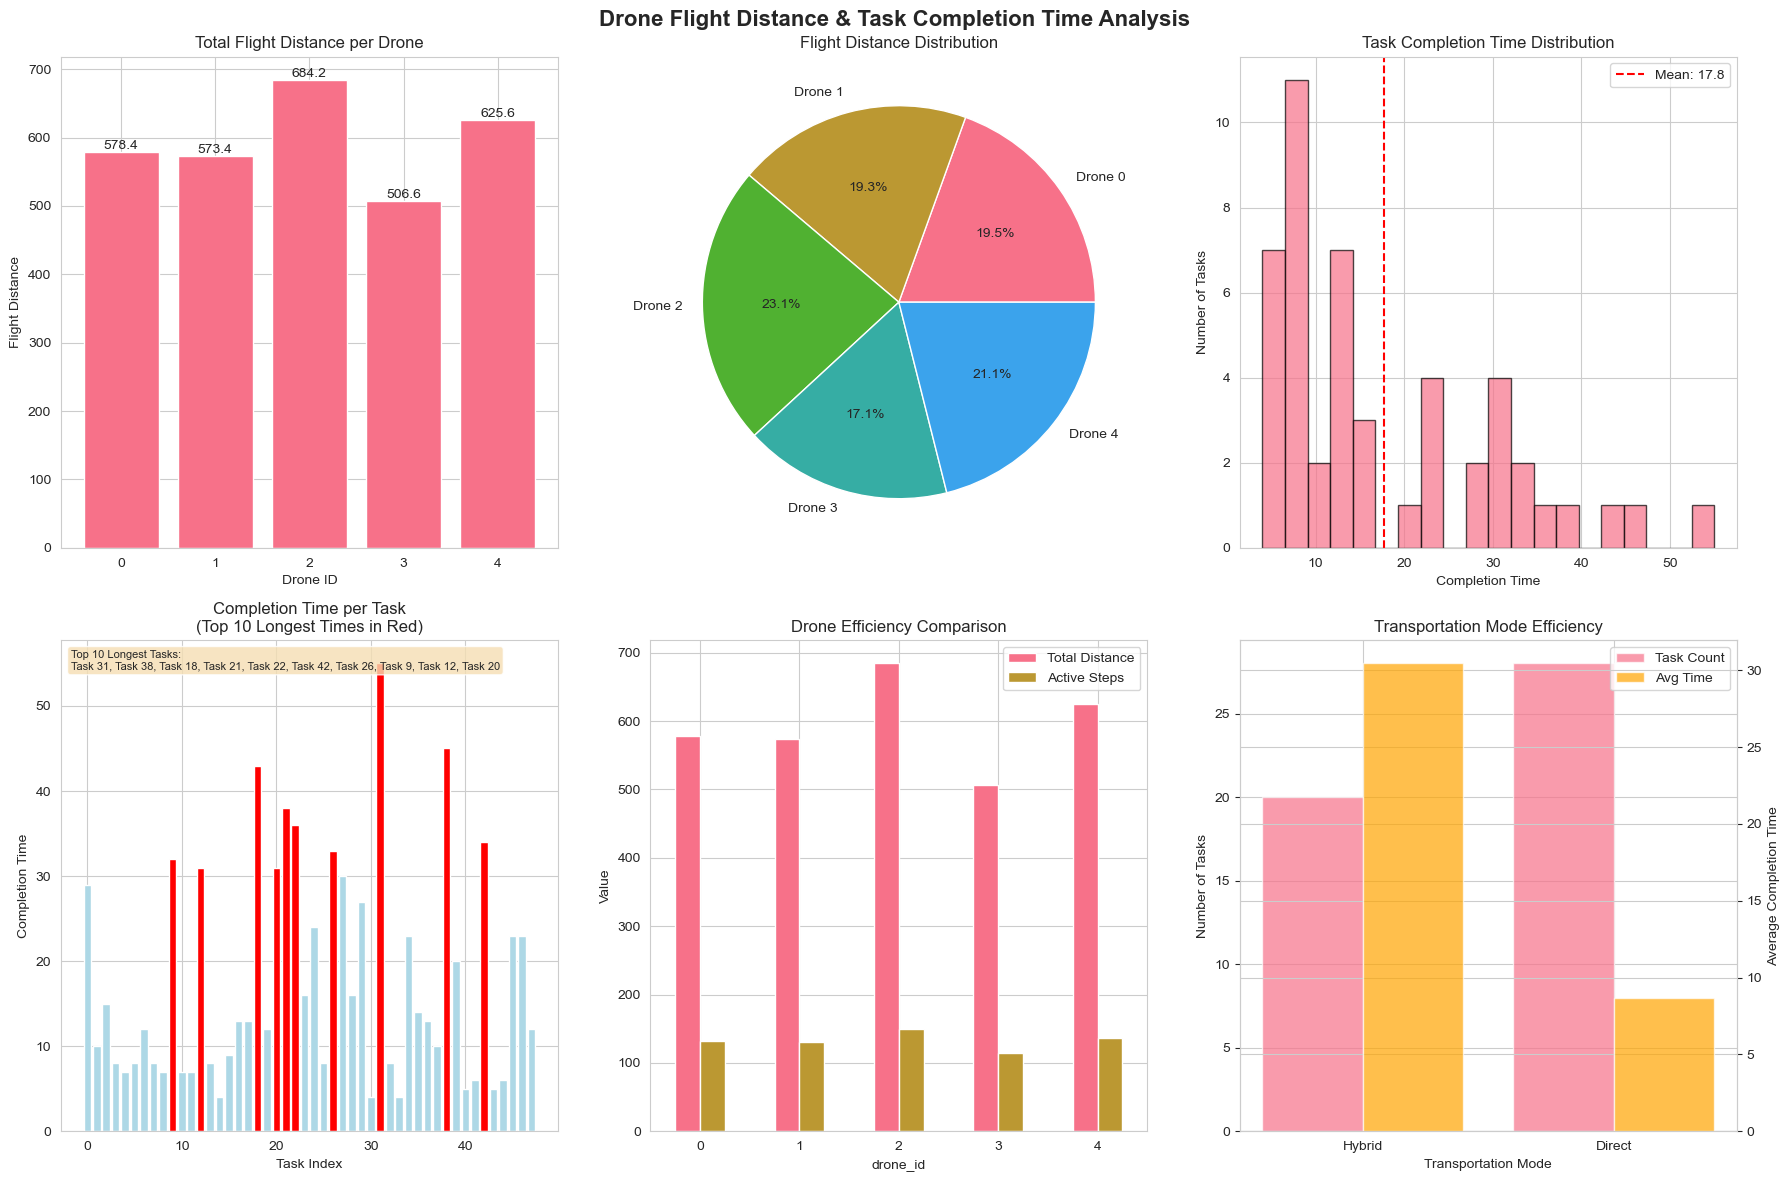


📋 EXECUTIVE SUMMARY REPORT

🚁 DRONE FLEET PERFORMANCE SUMMARY:
  Total drones deployed: 5
  TOTAL FLEET FLIGHT DISTANCE: 2968.29
  Average flight distance per drone: 593.66
  Flight distance standard deviation: 66.01
  Most efficient drone: Drone 2
  Least efficient drone: Drone 3

📦 TASK COMPLETION SUMMARY:
  Total completed tasks: 48
  TOTAL COMPLETION TIME (ALL TASKS): 852
  Average task completion time: 17.75
  Completion time standard deviation: 12.75
  Fastest task completion: 4
  Slowest task completion: 55
  Median completion time: 13.00

📊 SYSTEM EFFICIENCY METRICS:
  Distance/Time efficiency ratio: 33.45
  Fleet utilization rate: 13.28%
  Workload balance score: 88.88%

🚚 TRANSPORTATION MODE PERFORMANCE:
  Direct delivery tasks: 28 (Avg time: 8.68)
  Hybrid delivery tasks: 20 (Avg time: 30.45)

✅ ANALYSIS COMPLETED SUCCESSFULLY!

🎉 Analysis results are ready!
Key metrics calculated:
- Total flight distance: 2968.29
- Total completion time: 852
- Completed tasks: 48


In [22]:
if __name__ == "__main__":
    # Option 1: Analyze from CSV files
    print("🎯 LOGISTICS SIMULATION ANALYSIS")
    print("Choose analysis method:")
    print("1. Load data from CSV files")
    print("2. Use existing DataFrames")
    
    # Method 1: File-based analysis
    results = analyze_from_files()
    
    # Method 2: DataFrame-based analysis (if you already have the data)
    # results = analyze_drone_task_data(package_simulation_df, simulation_df)
    
    if results:
        print("\n🎉 Analysis results are ready!")
        print("Key metrics calculated:")
        print(f"- Total flight distance: {results['total_flight_distance']:.2f}")
        print(f"- Total completion time: {results['total_completion_time']}")
        print(f"- Completed tasks: {results['completed_tasks']}")

🎯 LOGISTICS SIMULATION ANALYSIS
Choose analysis method:
1. Load data from CSV files
2. Use existing DataFrames
✅ Package data loaded successfully: 48048 rows, 8 columns
✅ Simulation data loaded successfully: 29450 rows, 8 columns
🚀 STARTING DRONE FLIGHT DISTANCE AND TASK COMPLETION TIME ANALYSIS

DRONE FLIGHT DISTANCE ANALYSIS

🚁 Individual Drone Flight Distance Analysis:
--------------------------------------------------
Drone 0:
  Total flight distance: 442.24
  Average distance per step: 0.44
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 102

Drone 1:
  Total flight distance: 417.55
  Average distance per step: 0.42
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 94

Drone 2:
  Total flight distance: 440.60
  Average distance per step: 0.44
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 100

Drone 3:
  Total flight distance: 499.05
  Average distance per step: 0.50
  Maximum sing

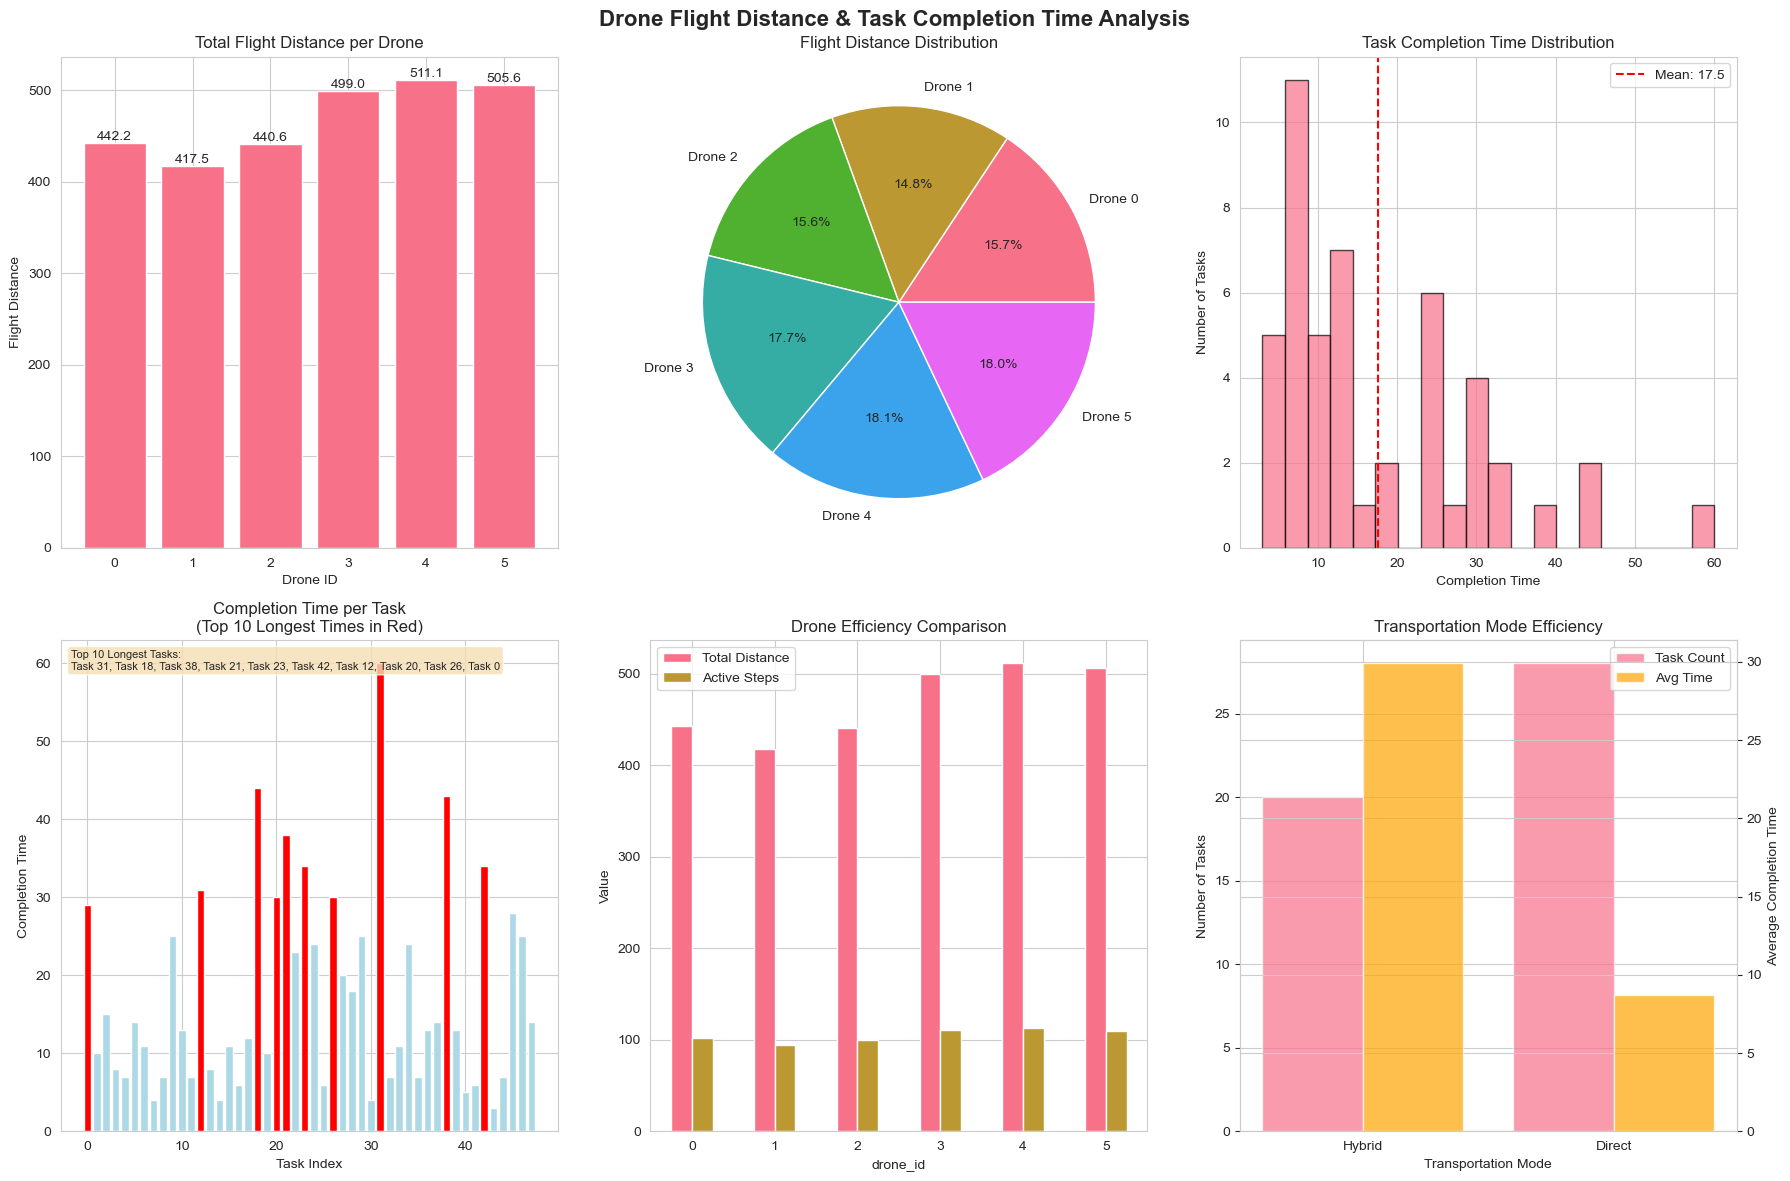


📋 EXECUTIVE SUMMARY REPORT

🚁 DRONE FLEET PERFORMANCE SUMMARY:
  Total drones deployed: 6
  TOTAL FLEET FLIGHT DISTANCE: 2816.10
  Average flight distance per drone: 469.35
  Flight distance standard deviation: 40.45
  Most efficient drone: Drone 4
  Least efficient drone: Drone 1

📦 TASK COMPLETION SUMMARY:
  Total completed tasks: 48
  TOTAL COMPLETION TIME (ALL TASKS): 842
  Average task completion time: 17.54
  Completion time standard deviation: 12.78
  Fastest task completion: 3
  Slowest task completion: 60
  Median completion time: 13.00

📊 SYSTEM EFFICIENCY METRICS:
  Distance/Time efficiency ratio: 26.76
  Fleet utilization rate: 10.50%
  Workload balance score: 91.38%

🚚 TRANSPORTATION MODE PERFORMANCE:
  Direct delivery tasks: 28 (Avg time: 8.71)
  Hybrid delivery tasks: 20 (Avg time: 29.90)

✅ ANALYSIS COMPLETED SUCCESSFULLY!

🎉 Analysis results are ready!
Key metrics calculated:
- Total flight distance: 2816.10
- Total completion time: 842
- Completed tasks: 48


In [23]:
if __name__ == "__main__":
    # Option 1: Analyze from CSV files
    print("🎯 LOGISTICS SIMULATION ANALYSIS")
    print("Choose analysis method:")
    print("1. Load data from CSV files")
    print("2. Use existing DataFrames")
    
    # Method 1: File-based analysis
    results = analyze_from_files()
    
    # Method 2: DataFrame-based analysis (if you already have the data)
    # results = analyze_drone_task_data(package_simulation_df, simulation_df)
    
    if results:
        print("\n🎉 Analysis results are ready!")
        print("Key metrics calculated:")
        print(f"- Total flight distance: {results['total_flight_distance']:.2f}")
        print(f"- Total completion time: {results['total_completion_time']}")
        print(f"- Completed tasks: {results['completed_tasks']}")

🎯 LOGISTICS SIMULATION ANALYSIS
Choose analysis method:
1. Load data from CSV files
2. Use existing DataFrames
✅ Package data loaded successfully: 48048 rows, 8 columns
✅ Simulation data loaded successfully: 31452 rows, 8 columns
🚀 STARTING DRONE FLIGHT DISTANCE AND TASK COMPLETION TIME ANALYSIS

DRONE FLIGHT DISTANCE ANALYSIS

🚁 Individual Drone Flight Distance Analysis:
--------------------------------------------------
Drone 0:
  Total flight distance: 325.85
  Average distance per step: 0.33
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 77

Drone 1:
  Total flight distance: 268.89
  Average distance per step: 0.27
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 61

Drone 2:
  Total flight distance: 194.92
  Average distance per step: 0.19
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 44

Drone 3:
  Total flight distance: 219.38
  Average distance per step: 0.22
  Maximum single

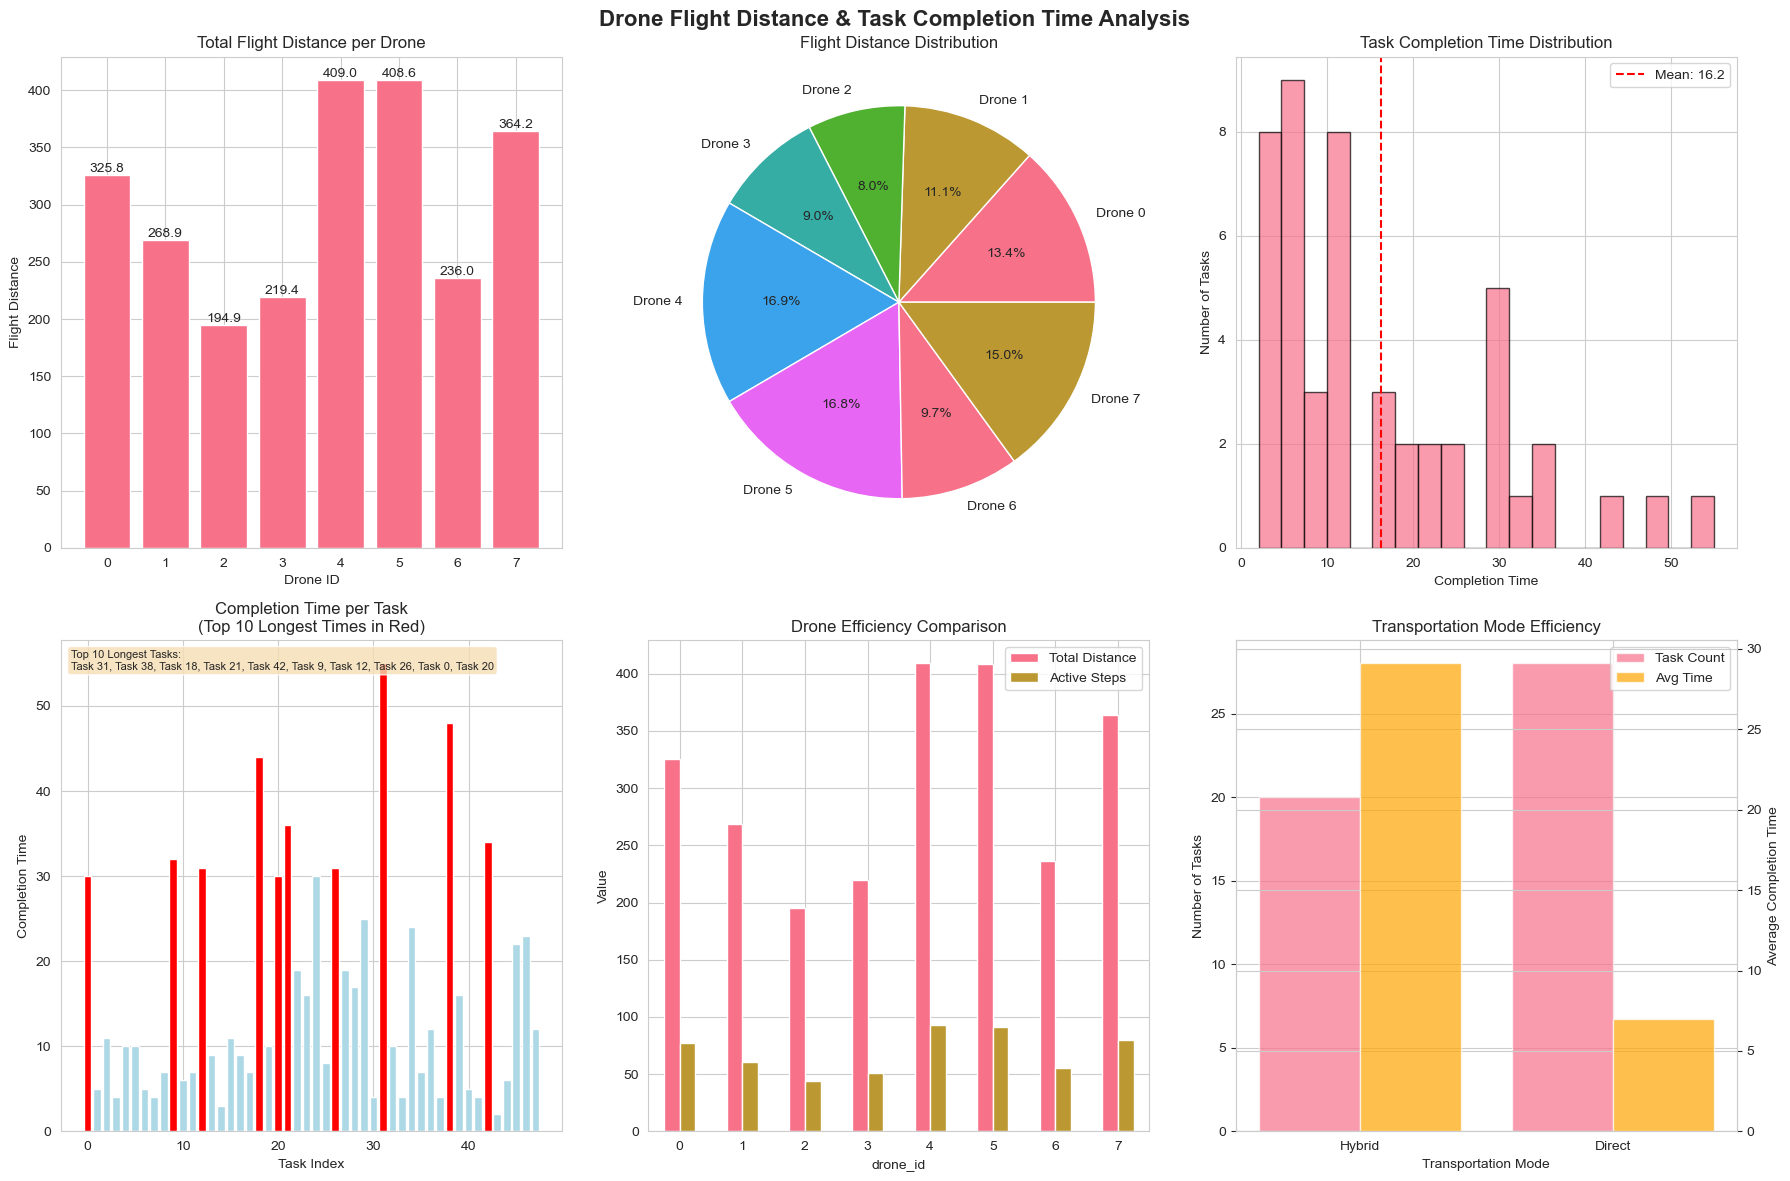


📋 EXECUTIVE SUMMARY REPORT

🚁 DRONE FLEET PERFORMANCE SUMMARY:
  Total drones deployed: 8
  TOTAL FLEET FLIGHT DISTANCE: 2426.74
  Average flight distance per drone: 303.34
  Flight distance standard deviation: 85.34
  Most efficient drone: Drone 4
  Least efficient drone: Drone 2

📦 TASK COMPLETION SUMMARY:
  Total completed tasks: 48
  TOTAL COMPLETION TIME (ALL TASKS): 778
  Average task completion time: 16.21
  Completion time standard deviation: 13.13
  Fastest task completion: 2
  Slowest task completion: 55
  Median completion time: 10.50

📊 SYSTEM EFFICIENCY METRICS:
  Distance/Time efficiency ratio: 18.72
  Fleet utilization rate: 6.90%
  Workload balance score: 71.87%

🚚 TRANSPORTATION MODE PERFORMANCE:
  Direct delivery tasks: 28 (Avg time: 7.00)
  Hybrid delivery tasks: 20 (Avg time: 29.10)

✅ ANALYSIS COMPLETED SUCCESSFULLY!

🎉 Analysis results are ready!
Key metrics calculated:
- Total flight distance: 2426.74
- Total completion time: 778
- Completed tasks: 48


In [25]:
if __name__ == "__main__":
    # Option 1: Analyze from CSV files
    print("🎯 LOGISTICS SIMULATION ANALYSIS")
    print("Choose analysis method:")
    print("1. Load data from CSV files")
    print("2. Use existing DataFrames")
    
    # Method 1: File-based analysis
    results = analyze_from_files()
    
    # Method 2: DataFrame-based analysis (if you already have the data)
    # results = analyze_drone_task_data(package_simulation_df, simulation_df)
    
    if results:
        print("\n🎉 Analysis results are ready!")
        print("Key metrics calculated:")
        print(f"- Total flight distance: {results['total_flight_distance']:.2f}")
        print(f"- Total completion time: {results['total_completion_time']}")
        print(f"- Completed tasks: {results['completed_tasks']}")

        

🎯 LOGISTICS SIMULATION ANALYSIS
Choose analysis method:
1. Load data from CSV files
2. Use existing DataFrames
✅ Package data loaded successfully: 48048 rows, 8 columns
✅ Simulation data loaded successfully: 32453 rows, 8 columns
🚀 STARTING DRONE FLIGHT DISTANCE AND TASK COMPLETION TIME ANALYSIS

DRONE FLIGHT DISTANCE ANALYSIS

🚁 Individual Drone Flight Distance Analysis:
--------------------------------------------------
Drone 0:
  Total flight distance: 268.80
  Average distance per step: 0.27
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 67

Drone 1:
  Total flight distance: 353.87
  Average distance per step: 0.35
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 81

Drone 2:
  Total flight distance: 114.68
  Average distance per step: 0.11
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 27

Drone 3:
  Total flight distance: 373.41
  Average distance per step: 0.37
  Maximum single

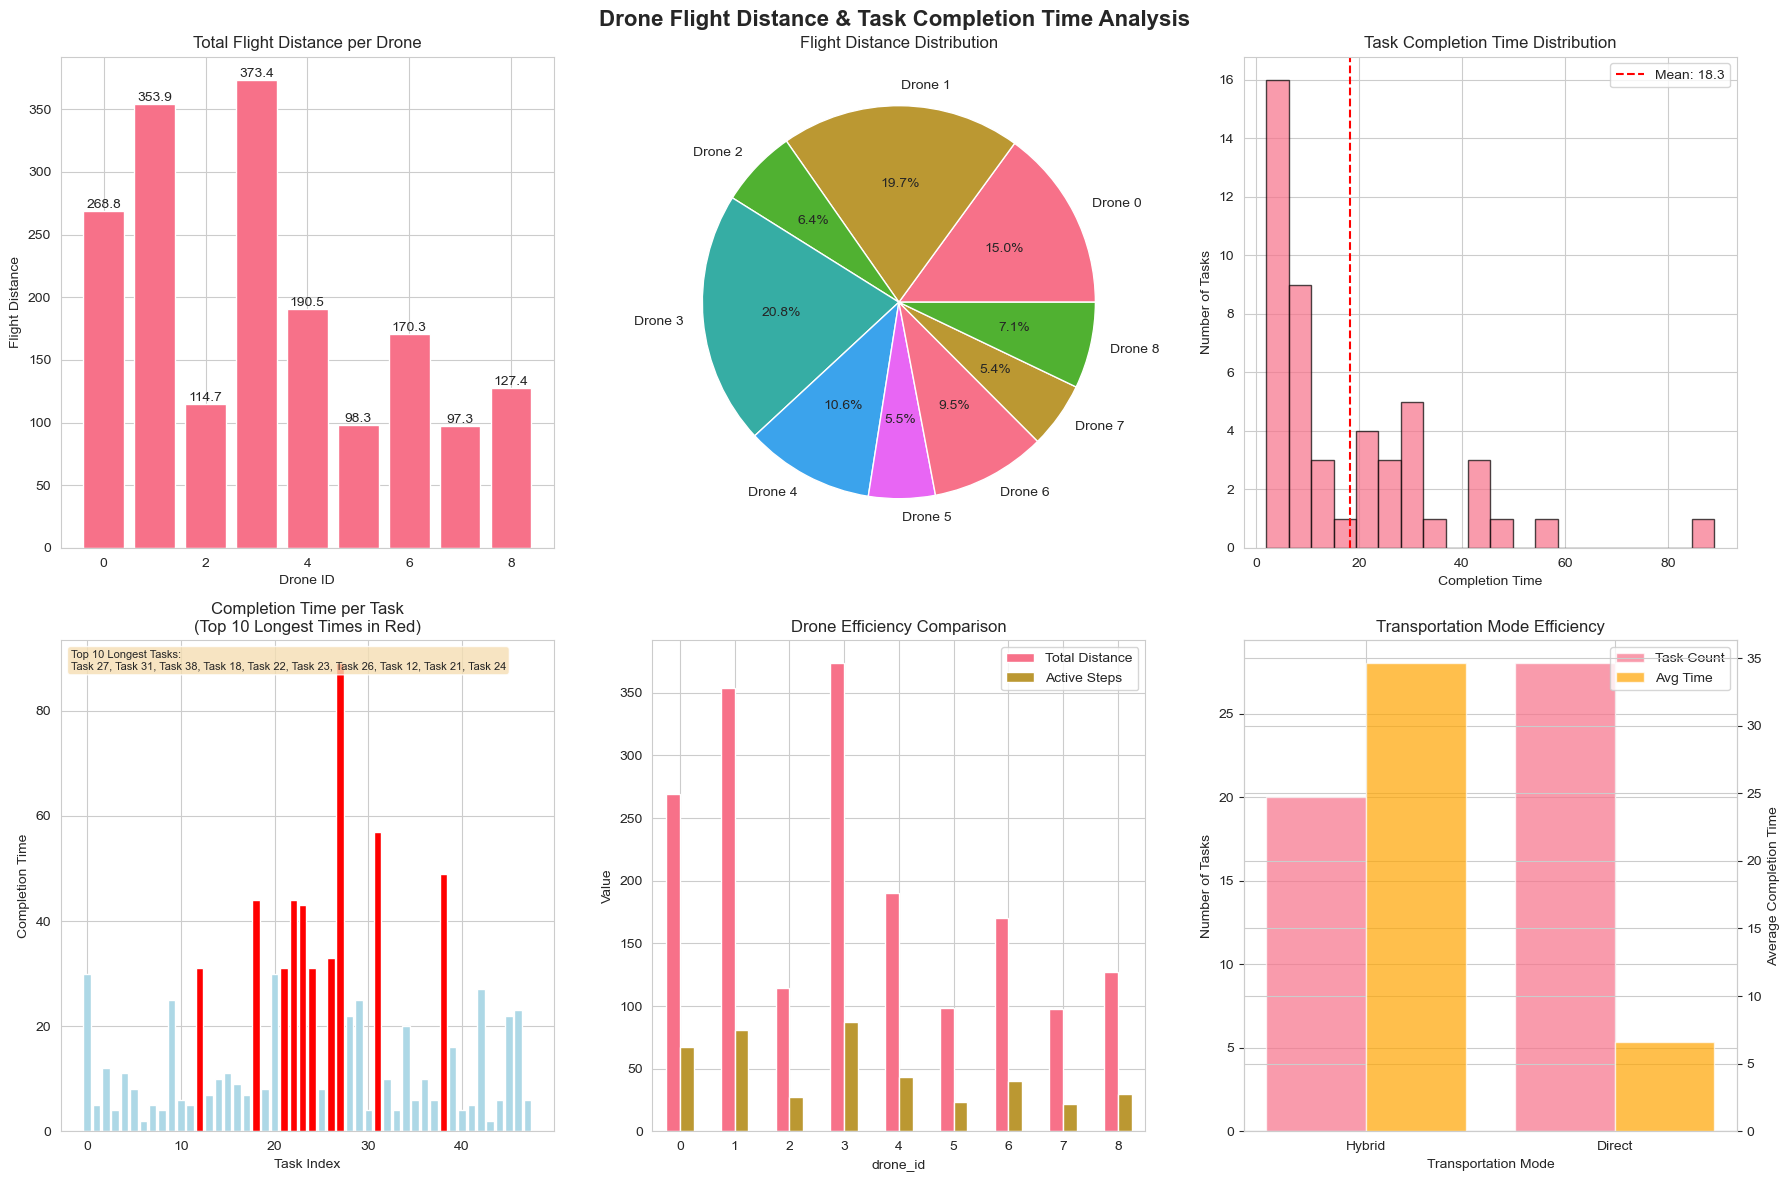


📋 EXECUTIVE SUMMARY REPORT

🚁 DRONE FLEET PERFORMANCE SUMMARY:
  Total drones deployed: 9
  TOTAL FLEET FLIGHT DISTANCE: 1794.52
  Average flight distance per drone: 199.39
  Flight distance standard deviation: 107.76
  Most efficient drone: Drone 3
  Least efficient drone: Drone 7

📦 TASK COMPLETION SUMMARY:
  Total completed tasks: 48
  TOTAL COMPLETION TIME (ALL TASKS): 877
  Average task completion time: 18.27
  Completion time standard deviation: 17.62
  Fastest task completion: 2
  Slowest task completion: 89
  Median completion time: 10.00

📊 SYSTEM EFFICIENCY METRICS:
  Distance/Time efficiency ratio: 10.91
  Fleet utilization rate: 4.67%
  Workload balance score: 45.96%

🚚 TRANSPORTATION MODE PERFORMANCE:
  Direct delivery tasks: 28 (Avg time: 6.61)
  Hybrid delivery tasks: 20 (Avg time: 34.60)

✅ ANALYSIS COMPLETED SUCCESSFULLY!

🎉 Analysis results are ready!
Key metrics calculated:
- Total flight distance: 1794.52
- Total completion time: 877
- Completed tasks: 48


In [26]:
if __name__ == "__main__":
    # Option 1: Analyze from CSV files
    print("🎯 LOGISTICS SIMULATION ANALYSIS")
    print("Choose analysis method:")
    print("1. Load data from CSV files")
    print("2. Use existing DataFrames")
    
    # Method 1: File-based analysis
    results = analyze_from_files()
    
    # Method 2: DataFrame-based analysis (if you already have the data)
    # results = analyze_drone_task_data(package_simulation_df, simulation_df)
    
    if results:
        print("\n🎉 Analysis results are ready!")
        print("Key metrics calculated:")
        print(f"- Total flight distance: {results['total_flight_distance']:.2f}")
        print(f"- Total completion time: {results['total_completion_time']}")
        print(f"- Completed tasks: {results['completed_tasks']}")

🎯 LOGISTICS SIMULATION ANALYSIS
Choose analysis method:
1. Load data from CSV files
2. Use existing DataFrames
✅ Package data loaded successfully: 48048 rows, 8 columns
✅ Simulation data loaded successfully: 32453 rows, 8 columns
🚀 STARTING DRONE FLIGHT DISTANCE AND TASK COMPLETION TIME ANALYSIS

DRONE FLIGHT DISTANCE ANALYSIS

🚁 Individual Drone Flight Distance Analysis:
--------------------------------------------------
Drone 0:
  Total flight distance: 240.10
  Average distance per step: 0.24
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 59

Drone 1:
  Total flight distance: 353.57
  Average distance per step: 0.35
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 79

Drone 2:
  Total flight distance: 189.94
  Average distance per step: 0.19
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 42

Drone 3:
  Total flight distance: 246.03
  Average distance per step: 0.25
  Maximum single

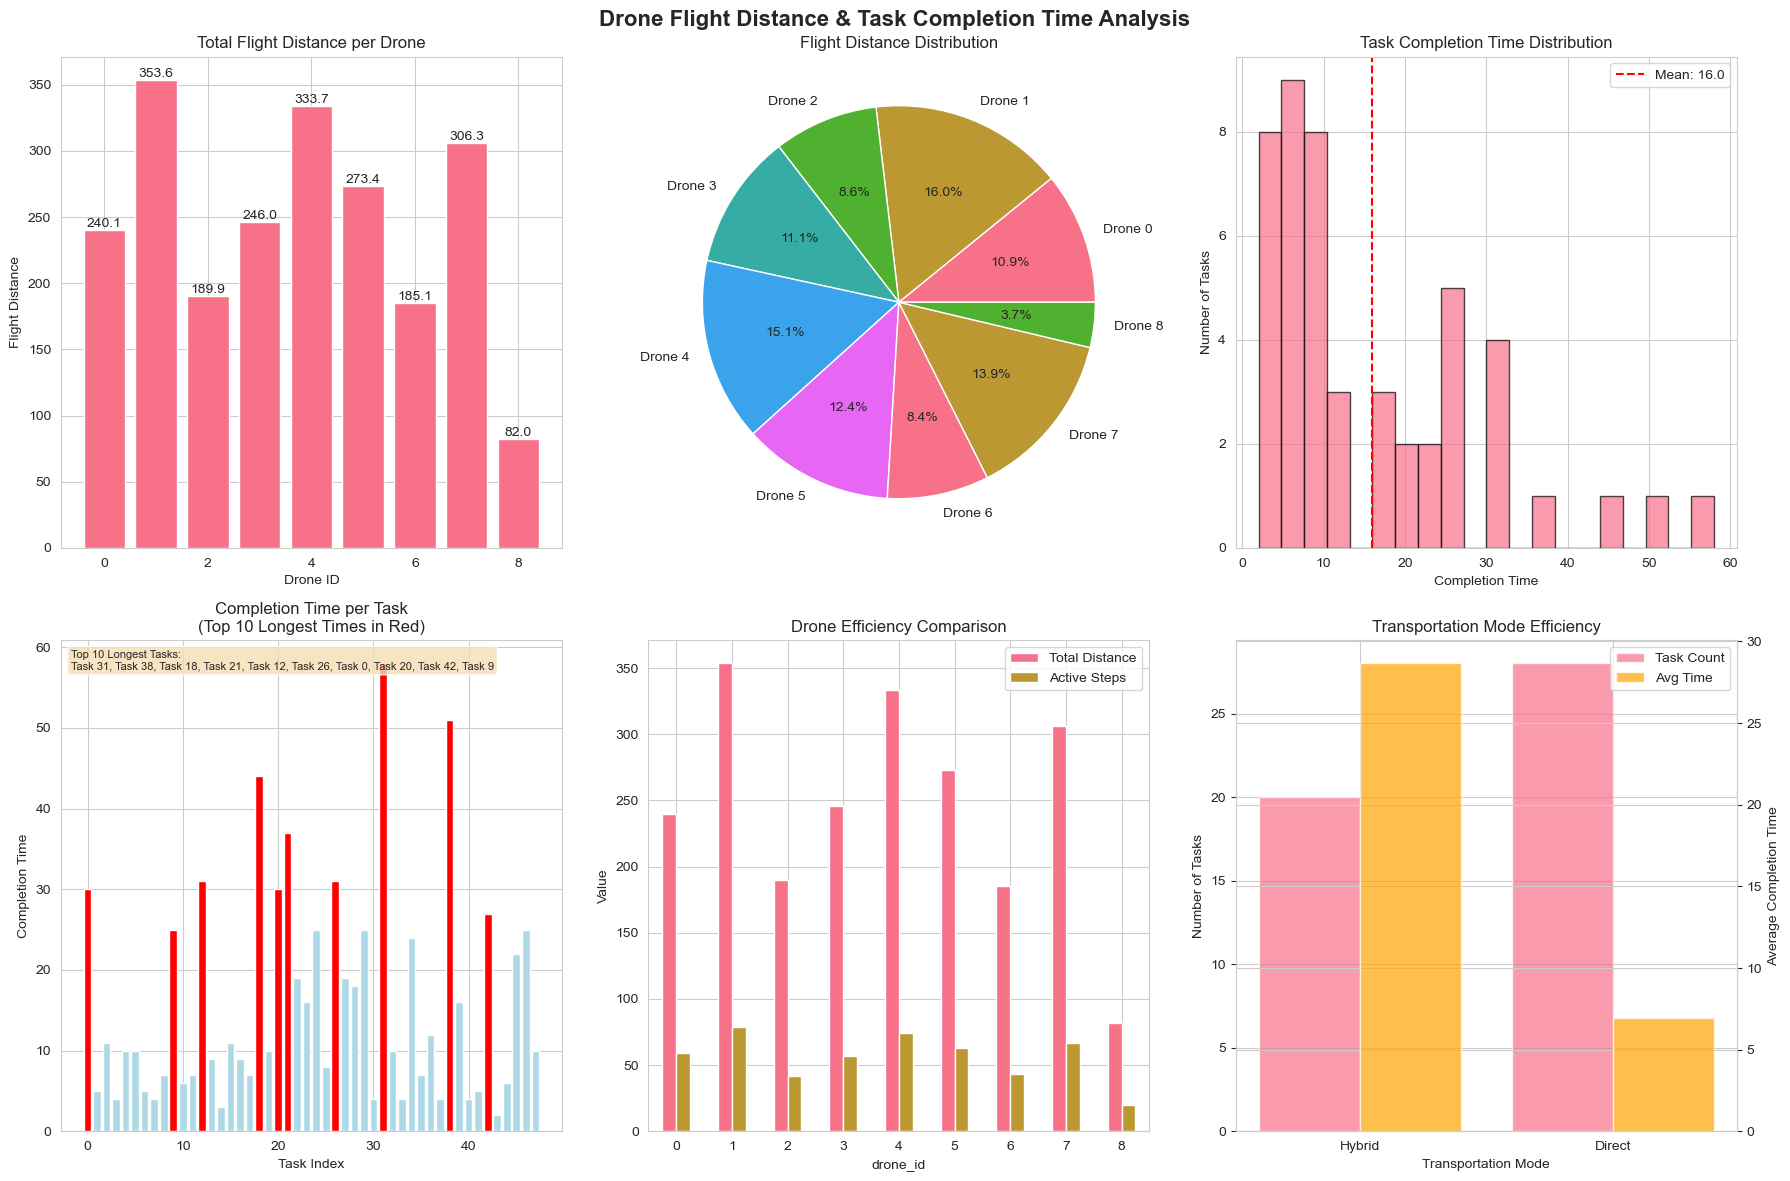


📋 EXECUTIVE SUMMARY REPORT

🚁 DRONE FLEET PERFORMANCE SUMMARY:
  Total drones deployed: 9
  TOTAL FLEET FLIGHT DISTANCE: 2210.11
  Average flight distance per drone: 245.57
  Flight distance standard deviation: 84.73
  Most efficient drone: Drone 1
  Least efficient drone: Drone 8

📦 TASK COMPLETION SUMMARY:
  Total completed tasks: 48
  TOTAL COMPLETION TIME (ALL TASKS): 767
  Average task completion time: 15.98
  Completion time standard deviation: 13.17
  Fastest task completion: 2
  Slowest task completion: 58
  Median completion time: 10.00

📊 SYSTEM EFFICIENCY METRICS:
  Distance/Time efficiency ratio: 15.37
  Fleet utilization rate: 5.60%
  Workload balance score: 65.50%

🚚 TRANSPORTATION MODE PERFORMANCE:
  Direct delivery tasks: 28 (Avg time: 6.93)
  Hybrid delivery tasks: 20 (Avg time: 28.65)

✅ ANALYSIS COMPLETED SUCCESSFULLY!

🎉 Analysis results are ready!
Key metrics calculated:
- Total flight distance: 2210.11
- Total completion time: 767
- Completed tasks: 48


In [27]:
if __name__ == "__main__":
    # Option 1: Analyze from CSV files
    print("🎯 LOGISTICS SIMULATION ANALYSIS")
    print("Choose analysis method:")
    print("1. Load data from CSV files")
    print("2. Use existing DataFrames")
    
    # Method 1: File-based analysis
    results = analyze_from_files()
    
    # Method 2: DataFrame-based analysis (if you already have the data)
    # results = analyze_drone_task_data(package_simulation_df, simulation_df)
    
    if results:
        print("\n🎉 Analysis results are ready!")
        print("Key metrics calculated:")
        print(f"- Total flight distance: {results['total_flight_distance']:.2f}")
        print(f"- Total completion time: {results['total_completion_time']}")
        print(f"- Completed tasks: {results['completed_tasks']}")

🎯 LOGISTICS SIMULATION ANALYSIS
Choose analysis method:
1. Load data from CSV files
2. Use existing DataFrames
✅ Package data loaded successfully: 48048 rows, 8 columns
✅ Simulation data loaded successfully: 29450 rows, 8 columns
🚀 STARTING DRONE FLIGHT DISTANCE AND TASK COMPLETION TIME ANALYSIS

DRONE FLIGHT DISTANCE ANALYSIS

🚁 Individual Drone Flight Distance Analysis:
--------------------------------------------------
Drone 0:
  Total flight distance: 424.55
  Average distance per step: 0.42
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 105

Drone 1:
  Total flight distance: 468.72
  Average distance per step: 0.47
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 105

Drone 2:
  Total flight distance: 184.53
  Average distance per step: 0.18
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 44

Drone 3:
  Total flight distance: 304.47
  Average distance per step: 0.30
  Maximum sing

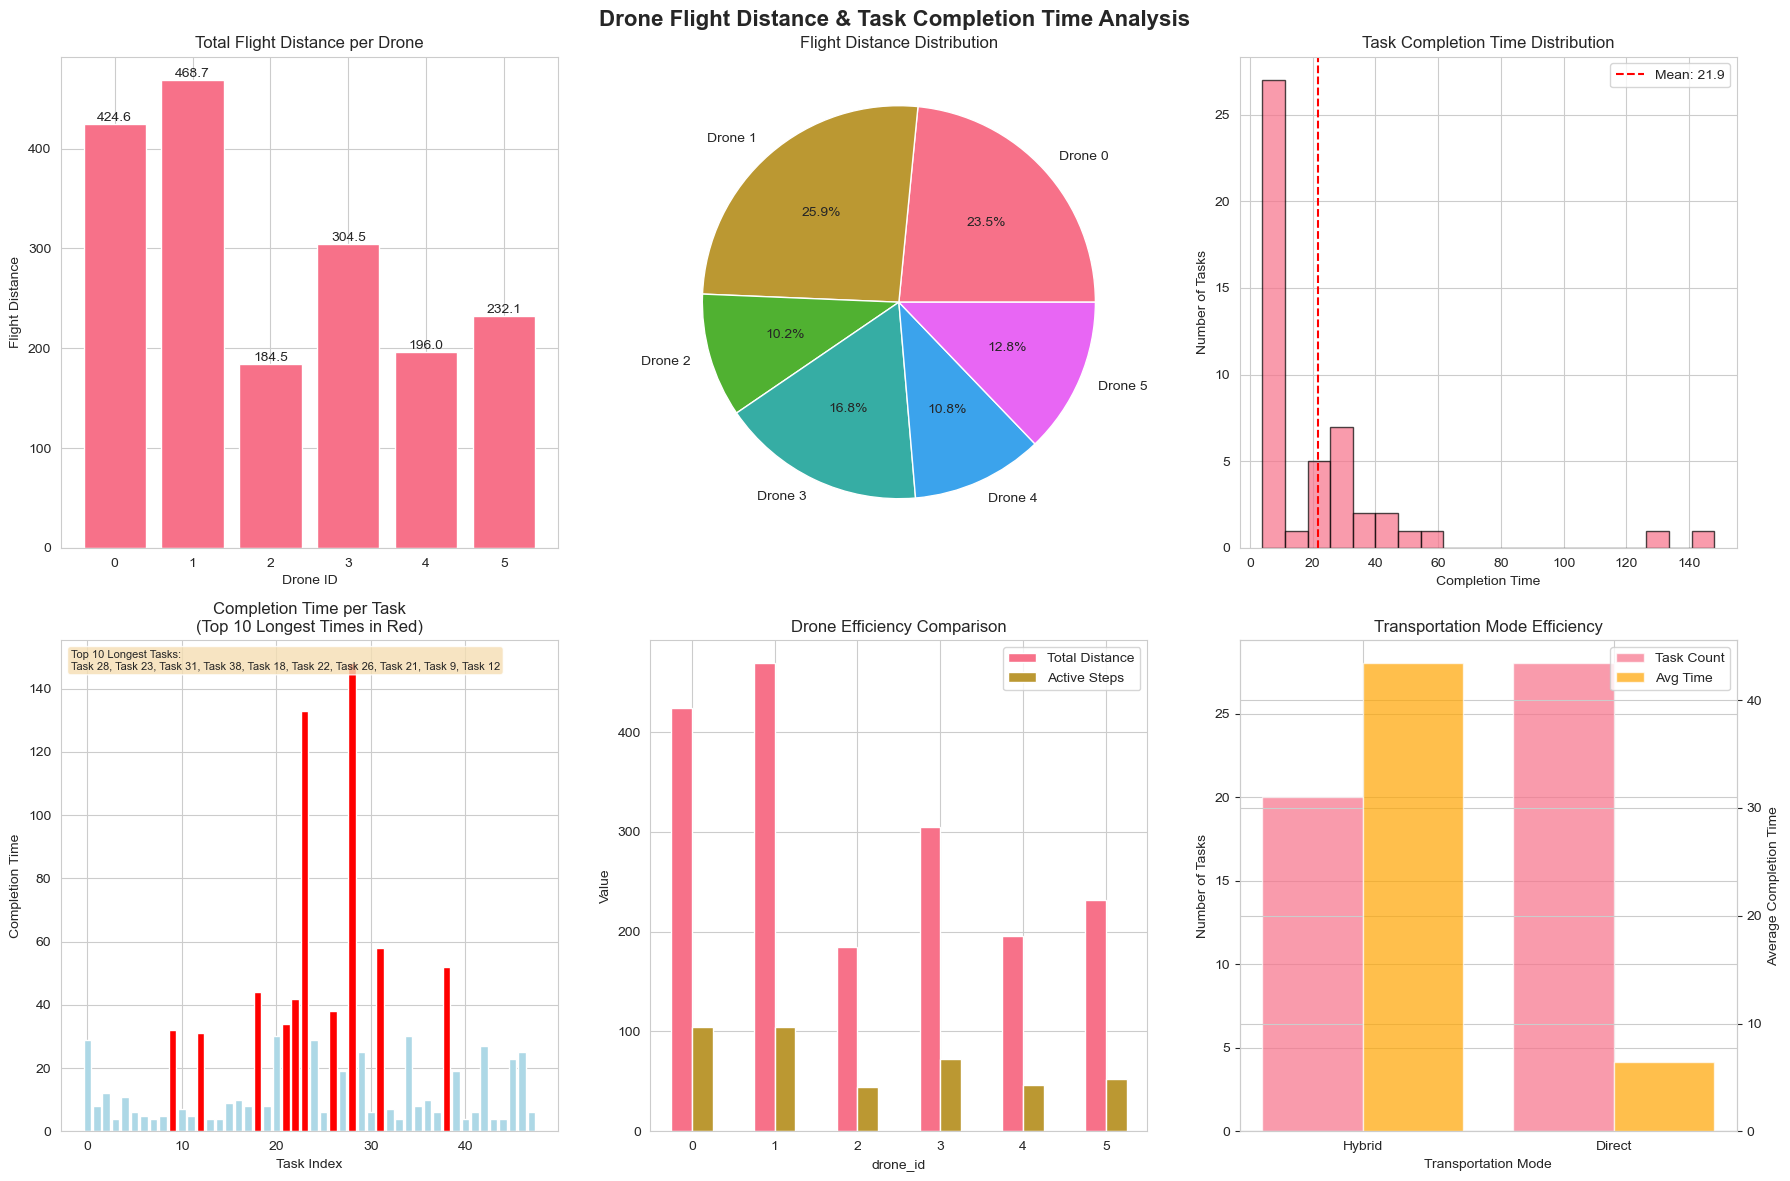


📋 EXECUTIVE SUMMARY REPORT

🚁 DRONE FLEET PERFORMANCE SUMMARY:
  Total drones deployed: 6
  TOTAL FLEET FLIGHT DISTANCE: 1810.38
  Average flight distance per drone: 301.73
  Flight distance standard deviation: 120.61
  Most efficient drone: Drone 1
  Least efficient drone: Drone 2

📦 TASK COMPLETION SUMMARY:
  Total completed tasks: 48
  TOTAL COMPLETION TIME (ALL TASKS): 1049
  Average task completion time: 21.85
  Completion time standard deviation: 28.83
  Fastest task completion: 4
  Slowest task completion: 148
  Median completion time: 9.50

📊 SYSTEM EFFICIENCY METRICS:
  Distance/Time efficiency ratio: 13.81
  Fleet utilization rate: 7.07%
  Workload balance score: 60.03%

🚚 TRANSPORTATION MODE PERFORMANCE:
  Direct delivery tasks: 28 (Avg time: 6.46)
  Hybrid delivery tasks: 20 (Avg time: 43.40)

✅ ANALYSIS COMPLETED SUCCESSFULLY!

🎉 Analysis results are ready!
Key metrics calculated:
- Total flight distance: 1810.38
- Total completion time: 1049
- Completed tasks: 48


In [28]:
if __name__ == "__main__":
    # Option 1: Analyze from CSV files
    print("🎯 LOGISTICS SIMULATION ANALYSIS")
    print("Choose analysis method:")
    print("1. Load data from CSV files")
    print("2. Use existing DataFrames")
    
    # Method 1: File-based analysis
    results = analyze_from_files()
    
    # Method 2: DataFrame-based analysis (if you already have the data)
    # results = analyze_drone_task_data(package_simulation_df, simulation_df)
    
    if results:
        print("\n🎉 Analysis results are ready!")
        print("Key metrics calculated:")
        print(f"- Total flight distance: {results['total_flight_distance']:.2f}")
        print(f"- Total completion time: {results['total_completion_time']}")
        print(f"- Completed tasks: {results['completed_tasks']}")

🎯 LOGISTICS SIMULATION ANALYSIS
Choose analysis method:
1. Load data from CSV files
2. Use existing DataFrames
✅ Package data loaded successfully: 48048 rows, 8 columns
✅ Simulation data loaded successfully: 29450 rows, 8 columns
🚀 STARTING DRONE FLIGHT DISTANCE AND TASK COMPLETION TIME ANALYSIS

DRONE FLIGHT DISTANCE ANALYSIS

🚁 Individual Drone Flight Distance Analysis:
--------------------------------------------------
Drone 0:
  Total flight distance: 424.55
  Average distance per step: 0.42
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 105

Drone 1:
  Total flight distance: 468.72
  Average distance per step: 0.47
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 105

Drone 2:
  Total flight distance: 184.53
  Average distance per step: 0.18
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 44

Drone 3:
  Total flight distance: 304.47
  Average distance per step: 0.30
  Maximum sing

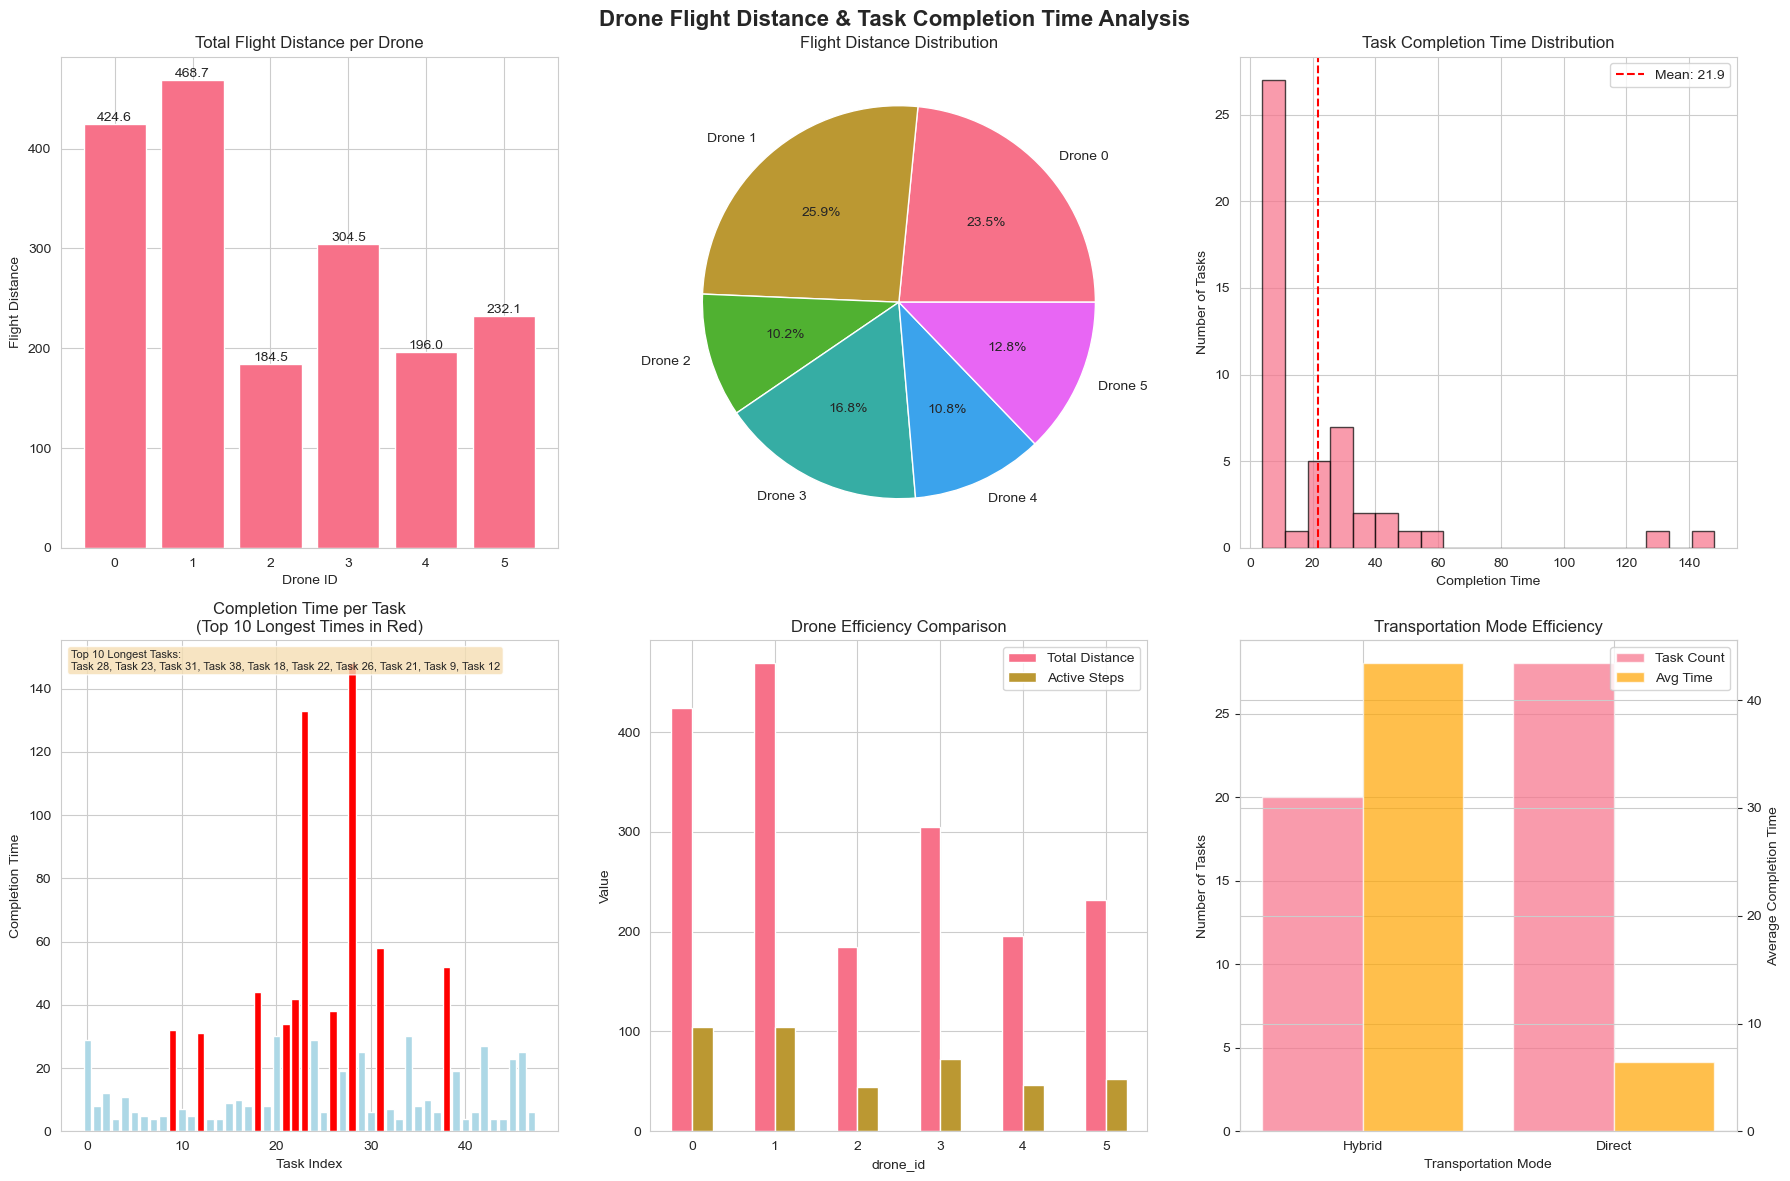


📋 EXECUTIVE SUMMARY REPORT

🚁 DRONE FLEET PERFORMANCE SUMMARY:
  Total drones deployed: 6
  TOTAL FLEET FLIGHT DISTANCE: 1810.38
  Average flight distance per drone: 301.73
  Flight distance standard deviation: 120.61
  Most efficient drone: Drone 1
  Least efficient drone: Drone 2

📦 TASK COMPLETION SUMMARY:
  Total completed tasks: 48
  TOTAL COMPLETION TIME (ALL TASKS): 1049
  Average task completion time: 21.85
  Completion time standard deviation: 28.83
  Fastest task completion: 4
  Slowest task completion: 148
  Median completion time: 9.50

📊 SYSTEM EFFICIENCY METRICS:
  Distance/Time efficiency ratio: 13.81
  Fleet utilization rate: 7.07%
  Workload balance score: 60.03%

🚚 TRANSPORTATION MODE PERFORMANCE:
  Direct delivery tasks: 28 (Avg time: 6.46)
  Hybrid delivery tasks: 20 (Avg time: 43.40)

✅ ANALYSIS COMPLETED SUCCESSFULLY!

🎉 Analysis results are ready!
Key metrics calculated:
- Total flight distance: 1810.38
- Total completion time: 1049
- Completed tasks: 48


In [29]:
if __name__ == "__main__":
    # Option 1: Analyze from CSV files
    print("🎯 LOGISTICS SIMULATION ANALYSIS")
    print("Choose analysis method:")
    print("1. Load data from CSV files")
    print("2. Use existing DataFrames")
    
    # Method 1: File-based analysis
    results = analyze_from_files()
    
    # Method 2: DataFrame-based analysis (if you already have the data)
    # results = analyze_drone_task_data(package_simulation_df, simulation_df)
    
    if results:
        print("\n🎉 Analysis results are ready!")
        print("Key metrics calculated:")
        print(f"- Total flight distance: {results['total_flight_distance']:.2f}")
        print(f"- Total completion time: {results['total_completion_time']}")
        print(f"- Completed tasks: {results['completed_tasks']}")

In [24]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os
# import glob
# from pathlib import Path

# class BatchResultsAnalyzer:
#     """
#     分析批量仿真实验结果的分析器
#     计算无人机总飞行距离和任务完成总时长
#     """
    
#     def __init__(self, results_directory):
#         self.results_dir = results_directory
#         self.summary_df = None
#         self.detailed_results = []
        
#     def load_experiment_summary(self):
#         """加载实验汇总文件"""
#         summary_file = os.path.join(self.results_dir, "experiment_summary.csv")
#         if os.path.exists(summary_file):
#             self.summary_df = pd.read_csv(summary_file)
#             print(f"✅ 加载实验汇总文件: {len(self.summary_df)} 个实验")
#             print(f"实验参数范围:")
#             print(f"  - 跨区域设置: {sorted(self.summary_df['allow_cross_region'].unique())}")
#             print(f"  - 无人机数量: {sorted(self.summary_df['drone_count'].unique())}")
#         else:
#             print(f"❌ 找不到实验汇总文件: {summary_file}")
#             return False
#         return True
    
#     def analyze_single_experiment(self, simulation_file, package_file):
#         """分析单个实验的飞行距离和任务完成时间"""
#         try:
#             # 加载数据
#             simulation_df = pd.read_csv(simulation_file)
#             package_df = pd.read_csv(package_file)
            
#             # 计算无人机总飞行距离
#             drone_data = simulation_df[simulation_df['entity'] == 'drone']
#             total_flight_distance = 0
            
#             for drone_id in drone_data['id'].unique():
#                 single_drone = drone_data[drone_data['id'] == drone_id].sort_values('time')
                
#                 # 计算每一步的移动距离
#                 distances = []
#                 for i in range(1, len(single_drone)):
#                     prev_x = single_drone.iloc[i-1]['x']
#                     prev_y = single_drone.iloc[i-1]['y']
#                     curr_x = single_drone.iloc[i]['x']
#                     curr_y = single_drone.iloc[i]['y']
                    
#                     distance = np.sqrt((curr_x - prev_x)**2 + (curr_y - prev_y)**2)
#                     distances.append(distance)
                
#                 drone_flight_distance = sum(distances)
#                 total_flight_distance += drone_flight_distance
            
#             # 计算任务完成总时长
#             # 计算任务完成总时长
#             total_completion_time = 0
#             completed_tasks = 0

#             for task_id in package_df['task_id'].unique():
#                 task_data = package_df[package_df['task_id'] == task_id].sort_values('time')
                
#                 # Check all statuses for this task
#                 all_statuses = task_data['status'].unique()
                
#                 # Check if task is actually completed (has delivered or directly_delivered status)
#                 has_delivered_status = any(status in ['delivered', 'directly_delivered'] for status in all_statuses)
                
#                 if has_delivered_status:
#                     # Find actual start time: first time status changes from 'at_pickup_point' to something else
#                     start_time = None
#                     pickup_point_records = task_data[task_data['status'] == 'at_pickup_point']
                    
#                     if not pickup_point_records.empty:
#                         # Find the first time after 'at_pickup_point' when status changes
#                         max_pickup_time = pickup_point_records['time'].max()
#                         next_records = task_data[task_data['time'] > max_pickup_time]
#                         if not next_records.empty:
#                             start_time = next_records['time'].min()
#                         else:
#                             # If never left pickup point, use first pickup point time
#                             start_time = pickup_point_records['time'].min()
#                     else:
#                         # If no 'at_pickup_point' status found, use minimum time
#                         start_time = task_data['time'].min()
                    
#                     # Find completion time: first time status becomes 'delivered' or 'directly_delivered'
#                     completion_records = task_data[task_data['status'].isin(['delivered', 'directly_delivered'])]
                    
#                     if not completion_records.empty:
#                         end_time = completion_records['time'].min()  # First time it became delivered
                        
#                         if start_time is not None and end_time is not None:
#                             completion_time = end_time - start_time
#                             total_completion_time += completion_time
#                             completed_tasks += 1
#             return {
#                 'total_flight_distance': total_flight_distance,
#                 'total_completion_time': total_completion_time,
#                 'completed_tasks': completed_tasks,
#                 'average_completion_time': total_completion_time / completed_tasks if completed_tasks > 0 else 0
#             }
            
#         except Exception as e:
#             print(f"❌ 分析文件时出错: {e}")
#             return None
    
#     def analyze_all_experiments(self):
#         """分析所有实验结果"""
#         if self.summary_df is None:
#             print("❌ 请先加载实验汇总文件")
#             return
        
#         print(f"\n{'='*60}")
#         print("开始分析所有实验结果")
#         print(f"{'='*60}")
        
#         detailed_results = []
        
#         for _, row in self.summary_df.iterrows():
#             exp_id = row['experiment_id']
#             allow_cross_region = row['allow_cross_region']
#             drone_count = row['drone_count']
            
#             # 构造文件路径
#             cross_region_str = "cross" if allow_cross_region else "nocross"
#             filename_prefix = f"exp_{exp_id:02d}_{cross_region_str}_drone{drone_count}"
            
#             simulation_file = os.path.join(self.results_dir, f"{filename_prefix}_simulation.csv")
#             package_file = os.path.join(self.results_dir, f"{filename_prefix}_package.csv")
            
#             if os.path.exists(simulation_file) and os.path.exists(package_file):
#                 print(f"分析实验 {exp_id}: 跨区域={allow_cross_region}, 无人机={drone_count}")
                
#                 analysis_result = self.analyze_single_experiment(simulation_file, package_file)
                
#                 if analysis_result:
#                     result_row = {
#                         'experiment_id': exp_id,
#                         'allow_cross_region': allow_cross_region,
#                         'drone_count': drone_count,
#                         'total_flight_distance': analysis_result['total_flight_distance'],
#                         'total_completion_time': analysis_result['total_completion_time'],
#                         'completed_tasks': analysis_result['completed_tasks'],
#                         'average_completion_time': analysis_result['average_completion_time'],
#                         'efficiency_ratio': analysis_result['total_flight_distance'] / analysis_result['total_completion_time'] if analysis_result['total_completion_time'] > 0 else 0
#                     }
#                     detailed_results.append(result_row)
#                 else:
#                     print(f"  ❌ 实验 {exp_id} 分析失败")
#             else:
#                 print(f"  ❌ 实验 {exp_id} 文件缺失")
        
#         self.detailed_results = pd.DataFrame(detailed_results)
        
#         if not self.detailed_results.empty:
#             print(f"\n✅ 成功分析 {len(self.detailed_results)} 个实验")
#             self.save_detailed_results()
#         else:
#             print(f"\n❌ 没有成功分析任何实验")
    
#     def save_detailed_results(self):
#         """保存详细分析结果"""
#         output_file = os.path.join(self.results_dir, "detailed_analysis_results.csv")
#         self.detailed_results.to_csv(output_file, index=False)
#         print(f"详细分析结果已保存到: {output_file}")
    
#     def display_summary_table(self):
#         """显示汇总表格"""
#         if self.detailed_results.empty:
#             print("❌ 没有分析结果可显示")
#             return
        
#         print(f"\n{'='*80}")
#         print("📊 所有实验结果汇总表")
#         print(f"{'='*80}")
        
#         # 按实验ID排序
#         display_df = self.detailed_results.sort_values('experiment_id').copy()
        
#         # 格式化显示
#         display_df['cross_region_str'] = display_df['allow_cross_region'].map({True: 'Yes', False: 'No'})
#         display_df['total_flight_distance'] = display_df['total_flight_distance'].round(2)
#         display_df['average_completion_time'] = display_df['average_completion_time'].round(2)
#         display_df['efficiency_ratio'] = display_df['efficiency_ratio'].round(3)
        
#         # 选择要显示的列
#         display_columns = [
#             'experiment_id', 'cross_region_str', 'drone_count', 
#             'total_flight_distance', 'total_completion_time', 
#             'completed_tasks', 'average_completion_time', 'efficiency_ratio'
#         ]
        
#         print(display_df[display_columns].to_string(index=False, 
#                                                    col_space=12,
#                                                    formatters={
#                                                        'total_flight_distance': '{:.2f}'.format,
#                                                        'average_completion_time': '{:.2f}'.format,
#                                                        'efficiency_ratio': '{:.3f}'.format
#                                                    }))
        
#         # 显示统计信息
#         print(f"\n📈 关键指标统计:")
#         print(f"  总飞行距离范围: {display_df['total_flight_distance'].min():.2f} - {display_df['total_flight_distance'].max():.2f}")
#         print(f"  平均飞行距离: {display_df['total_flight_distance'].mean():.2f}")
#         print(f"  总完成时间范围: {display_df['total_completion_time'].min()} - {display_df['total_completion_time'].max()}")
#         print(f"  平均总完成时间: {display_df['total_completion_time'].mean():.2f}")
        
#         # 按参数分组的统计
#         print(f"\n🔍 按跨区域设置分组:")
#         cross_region_stats = display_df.groupby('allow_cross_region').agg({
#             'total_flight_distance': ['mean', 'std'],
#             'total_completion_time': ['mean', 'std'],
#             'completed_tasks': 'mean'
#         }).round(2)
#         print(cross_region_stats)
        
#         print(f"\n🔍 按无人机数量分组:")
#         drone_count_stats = display_df.groupby('drone_count').agg({
#             'total_flight_distance': ['mean', 'std'],
#             'total_completion_time': ['mean', 'std'],
#             'completed_tasks': 'mean'
#         }).round(2)
#         print(drone_count_stats)
    
#     def create_visualizations(self):
#         """创建可视化图表"""
#         if self.detailed_results.empty:
#             print("❌ 没有数据可视化")
#             return
        
#         print(f"\n📊 生成可视化图表...")
        
#         fig, axes = plt.subplots(2, 3, figsize=(18, 12))
#         fig.suptitle('Batch Simulation Results Analysis', fontsize=16, fontweight='bold')
        
#         # 1. 总飞行距离 vs 无人机数量
#         ax1 = axes[0, 0]
#         for cross_region in [True, False]:
#             data = self.detailed_results[self.detailed_results['allow_cross_region'] == cross_region]
#             label = 'Cross Region' if cross_region else 'No Cross Region'
#             ax1.plot(data['drone_count'], data['total_flight_distance'], 
#                     marker='o', label=label, linewidth=2, markersize=6)
#         ax1.set_xlabel('Number of Drones')
#         ax1.set_ylabel('Total Flight Distance')
#         ax1.set_title('Total Flight Distance vs Drone Count')
#         ax1.legend()
#         ax1.grid(True, alpha=0.3)
        
#         # 2. 总完成时间 vs 无人机数量
#         ax2 = axes[0, 1]
#         for cross_region in [True, False]:
#             data = self.detailed_results[self.detailed_results['allow_cross_region'] == cross_region]
#             label = 'Cross Region' if cross_region else 'No Cross Region'
#             ax2.plot(data['drone_count'], data['total_completion_time'], 
#                     marker='s', label=label, linewidth=2, markersize=6)
#         ax2.set_xlabel('Number of Drones')
#         ax2.set_ylabel('Total Completion Time')
#         ax2.set_title('Total Completion Time vs Drone Count')
#         ax2.legend()
#         ax2.grid(True, alpha=0.3)
        
#         # 3. 效率比率对比
#         ax3 = axes[0, 2]
#         cross_yes = self.detailed_results[self.detailed_results['allow_cross_region'] == True]
#         cross_no = self.detailed_results[self.detailed_results['allow_cross_region'] == False]
        
#         x = np.arange(len(cross_yes))
#         width = 0.35
        
#         ax3.bar(x - width/2, cross_yes['efficiency_ratio'], width, label='Cross Region', alpha=0.8)
#         ax3.bar(x + width/2, cross_no['efficiency_ratio'], width, label='No Cross Region', alpha=0.8)
#         ax3.set_xlabel('Drone Count')
#         ax3.set_ylabel('Efficiency Ratio (Distance/Time)')
#         ax3.set_title('Efficiency Ratio Comparison')
#         ax3.set_xticks(x)
#         ax3.set_xticklabels(cross_yes['drone_count'])
#         ax3.legend()
        
#         # 4. 完成任务数对比
#         ax4 = axes[1, 0]
#         ax4.bar(x - width/2, cross_yes['completed_tasks'], width, label='Cross Region', alpha=0.8)
#         ax4.bar(x + width/2, cross_no['completed_tasks'], width, label='No Cross Region', alpha=0.8)
#         ax4.set_xlabel('Drone Count')
#         ax4.set_ylabel('Completed Tasks')
#         ax4.set_title('Completed Tasks Comparison')
#         ax4.set_xticks(x)
#         ax4.set_xticklabels(cross_yes['drone_count'])
#         ax4.legend()
        
#         # 5. 散点图：飞行距离 vs 完成时间
#         ax5 = axes[1, 1]
#         for cross_region in [True, False]:
#             data = self.detailed_results[self.detailed_results['allow_cross_region'] == cross_region]
#             label = 'Cross Region' if cross_region else 'No Cross Region'
#             ax5.scatter(data['total_flight_distance'], data['total_completion_time'], 
#                        label=label, alpha=0.7, s=60)
#         ax5.set_xlabel('Total Flight Distance')
#         ax5.set_ylabel('Total Completion Time')
#         ax5.set_title('Flight Distance vs Completion Time')
#         ax5.legend()
#         ax5.grid(True, alpha=0.3)
        
#         # 6. 热力图：参数组合的效果
#         ax6 = axes[1, 2]
#         pivot_data = self.detailed_results.pivot(index='allow_cross_region', 
#                                                 columns='drone_count', 
#                                                 values='total_flight_distance')
#         sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax6)
#         ax6.set_title('Total Flight Distance Heatmap')
#         ax6.set_xlabel('Number of Drones')
#         ax6.set_ylabel('Allow Cross Region')
        
#         plt.tight_layout()
        
#         # 保存图表
#         plot_file = os.path.join(self.results_dir, "batch_analysis_plots.png")
#         plt.savefig(plot_file, dpi=300, bbox_inches='tight')
#         print(f"可视化图表已保存到: {plot_file}")
#         plt.show()
    
#     def find_best_configurations(self):
#         """找出最佳配置"""
#         if self.detailed_results.empty:
#             print("❌ 没有分析结果")
#             return
        
#         print(f"\n🏆 最佳配置分析:")
#         print(f"{'='*50}")
        
#         # 最小总飞行距离
#         min_flight_idx = self.detailed_results['total_flight_distance'].idxmin()
#         min_flight_config = self.detailed_results.loc[min_flight_idx]
#         print(f"🥇 最小总飞行距离:")
#         print(f"   实验 {min_flight_config['experiment_id']}: 跨区域={min_flight_config['allow_cross_region']}, "
#               f"无人机={min_flight_config['drone_count']}, 距离={min_flight_config['total_flight_distance']:.2f}")
        
#         # 最小总完成时间
#         min_time_idx = self.detailed_results['total_completion_time'].idxmin()
#         min_time_config = self.detailed_results.loc[min_time_idx]
#         print(f"🥇 最小总完成时间:")
#         print(f"   实验 {min_time_config['experiment_id']}: 跨区域={min_time_config['allow_cross_region']}, "
#               f"无人机={min_time_config['drone_count']}, 时间={min_time_config['total_completion_time']}")
        
#         # 最高效率比率
#         max_efficiency_idx = self.detailed_results['efficiency_ratio'].idxmax()
#         max_efficiency_config = self.detailed_results.loc[max_efficiency_idx]
#         print(f"🥇 最高效率比率:")
#         print(f"   实验 {max_efficiency_config['experiment_id']}: 跨区域={max_efficiency_config['allow_cross_region']}, "
#               f"无人机={max_efficiency_config['drone_count']}, 效率={max_efficiency_config['efficiency_ratio']:.3f}")
    
#     def run_complete_analysis(self):
#         """运行完整分析流程"""
#         print("🚀 开始批量实验结果分析")
        
#         if not self.load_experiment_summary():
#             return
        
#         self.analyze_all_experiments()
        
#         if not self.detailed_results.empty:
#             self.display_summary_table()
#             self.find_best_configurations()
#             self.create_visualizations()
            
#             print(f"\n✅ 分析完成！结果已保存到 {self.results_dir}")

# # 使用函数
# def analyze_batch_results(results_directory):
#     """分析批量实验结果的便捷函数"""
#     analyzer = BatchResultsAnalyzer(results_directory)
#     analyzer.run_complete_analysis()
#     return analyzer

# # 使用示例
# if __name__ == "__main__":
#     # 使用方法：
#     results_dir = "simulation_results_20250523_130424"  # 你的结果文件夹路径
#     analyzer = analyze_batch_results(results_dir)
    
#     print("批量结果分析器已准备就绪!")
#     print("使用方法:")
#     print("1. analyzer = analyze_batch_results('你的结果文件夹路径')")
#     print("2. 程序会自动分析所有CSV文件并生成汇总报告")
#     print("3. 查看详细分析结果和可视化图表")